# Second-Phase-Evaluation-Projects--1-

# Temperature Forecast Project using ML

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


# Table Of Content

1.Importing Libraries
2.Importing Dataset
3.Extraplotary Data Analysis
4.Data Visualization
5.Data Encoding
6.Outliers Detection And Removal
7.Skewness
8.Corelation of Target Variable with other Feature Variable
9.Feature Engineering
10.Multicolinearity
11.Model Selection
12.Hyperparameter Tuning
13.Saving The Model

# 1. Importing Libraries

In [9]:
# Data Analysis & Manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Geocoder, Scaler, Preprocessor, Outlier Removal, Decomposition
import reverse_geocoder as rg
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

#Evaluation & Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Saving Model
import pickle

# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

# 2 .Importing Dataset

In [10]:
df = pd.read_csv('C:/Users/Sayan Mondal/Downloads/temperature (1).csv')

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# 3.Extraplotary Data Analysis

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [8]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


In [9]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [10]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [11]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0


In [12]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
Day                        float64
Month                      float64
Year                       float64
dtype: object

In [13]:
df.shape

(7752, 28)

In [12]:
# Dropping Date column
df.drop('Date', axis=1, inplace = True)

df.shape

(7752, 27)

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

In [13]:
print("We had {} Rows and {} Columns before dropping null values.".format(*df.shape))

# Dropping Nan Values
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(*df.shape))

We had 7752 Rows and 27 Columns before dropping null values.
We have 7588 Rows and 27 Columns after dropping null values.


In [14]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

In [15]:
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(df['lat'], df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
# Creating dataframe for geographical name
geo_names = pd.DataFrame(geodata).transpose()

In [16]:
#Creating 2 New Columns State & City
df['State']= geo_names[0].apply(lambda x:x.get('admin1'))
df['City']=geo_names[0].apply(lambda x:x.get('name'))

In [17]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year,State,City
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0,Seoul,Seoul
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0,Seoul,Seoul
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0,Seoul,Seoul
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0,Seoul,Seoul
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0,Gyeonggi-do,Guri-si


In [18]:
df.shape

(7588, 29)

In [23]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Day                 float64
Month               float64
Year                float64
State                object
City                 object
dtype: object

In [24]:
# Let's determine the maximum and minimum temperatures over the specified period.

print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print('Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*75)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
Average Present Maximum Temperature in year 2013-2016 : 29.748365840801263
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377437


In [25]:
# Checking Present_Tmax Maximum
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year,State,City
5717,18.0,37.6,26.8,44.254253,87.745514,34.794021,27.150764,6.366598,111.225118,0.218892,0.094288,0.004283,0.000343,0.0,0.0,0.0,0.0,37.4832,127.024,56.4448,1.2313,5082.563477,37.0,27.8,8.0,11.0,2016.0,Gyeonggi-do,Bucheon-si


In [26]:
# Checking  Present_Tmax Minimum
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year,State,City
7725,1.0,20.0,15.1,35.652172,89.97319,24.323737,16.128899,7.087329,108.981108,0.046182,0.014955,0.0,0.00063,0.0,0.0,0.0,0.0,37.6046,126.991,212.335,2.785,4614.76123,23.8,15.1,30.0,8.0,2017.0,NaN,NaN


# 4.Data Visualization

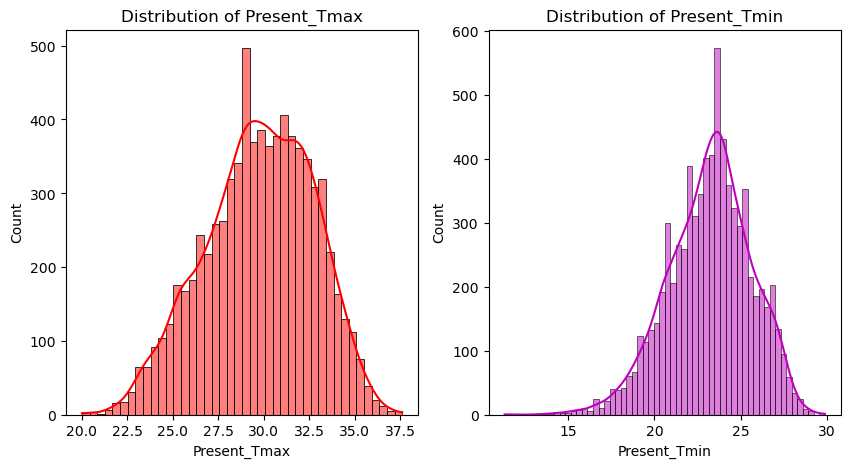

In [27]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(10,5))

#First Plot: Distribution of Present_Tmax
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.title("Distribution of Present_Tmax")

# Second Plot: Distribution of Present_Tmin
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.title("Distribution of Present_Tmin")

plt.show()

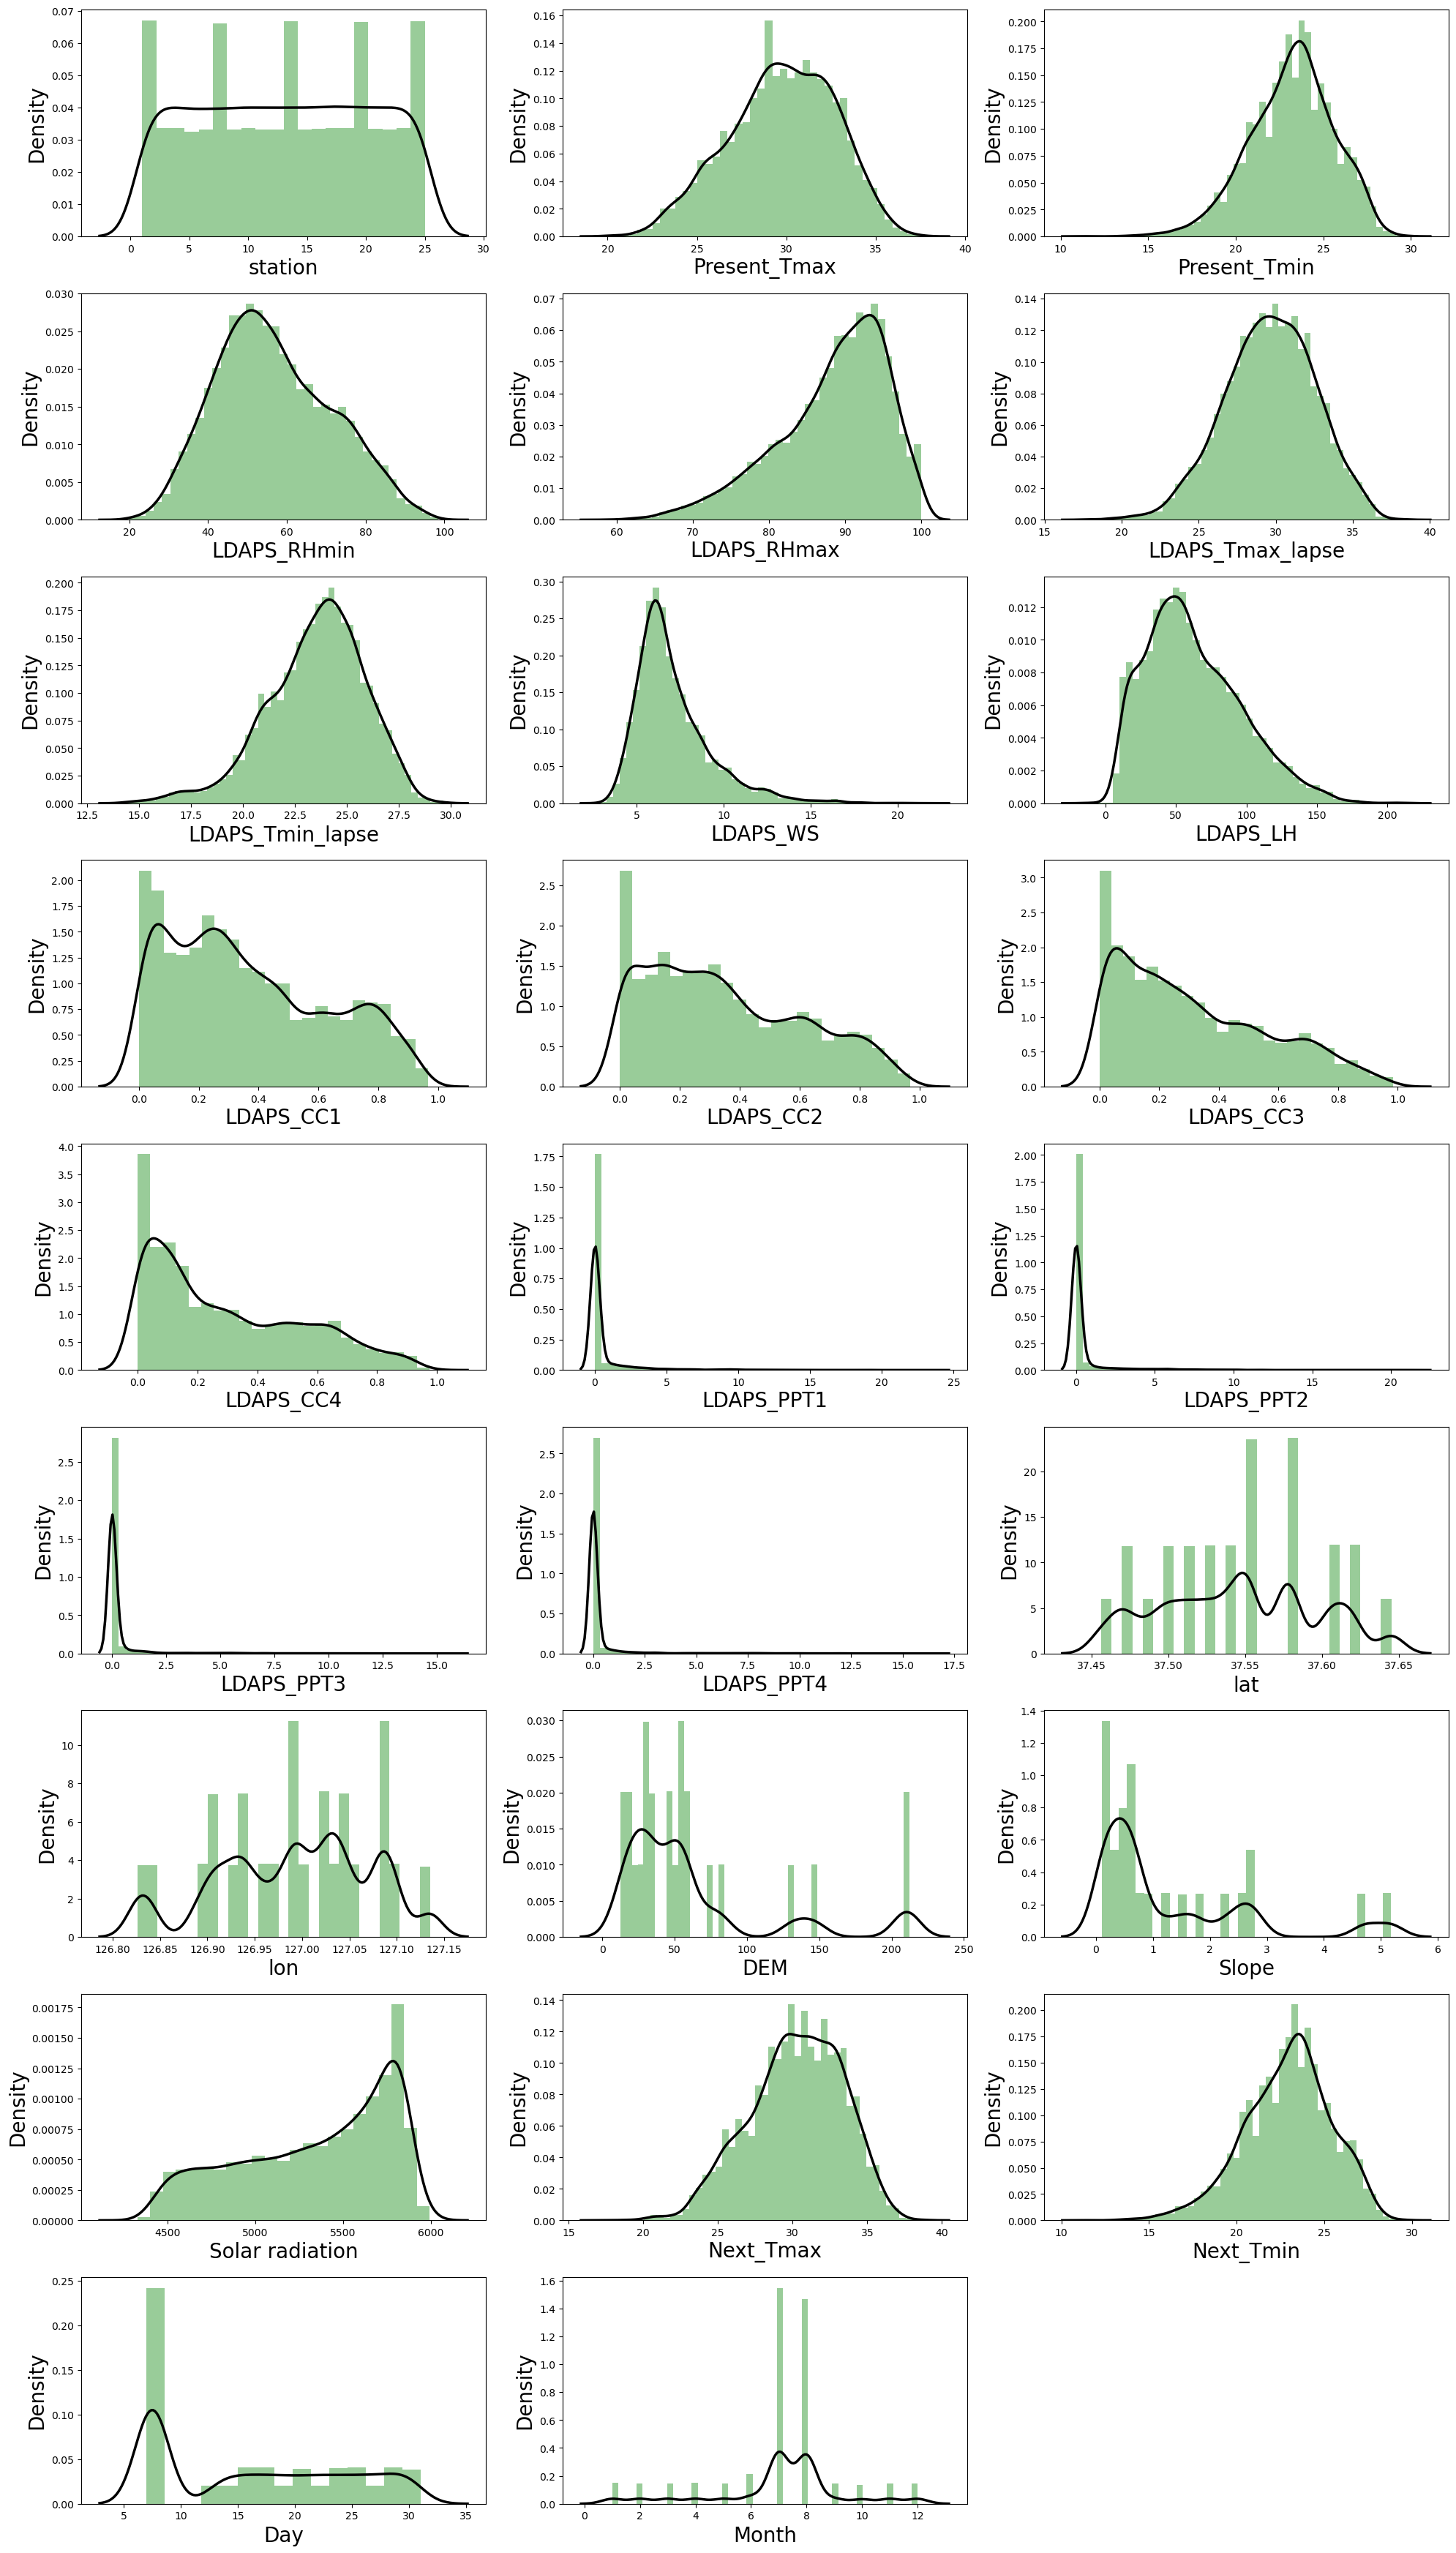

In [28]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber= 1

for column in df.columns:
    if plotnumber<=26:
        ax= plt.subplot(9,3, plotnumber)
        sns.distplot(df[column], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Density', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

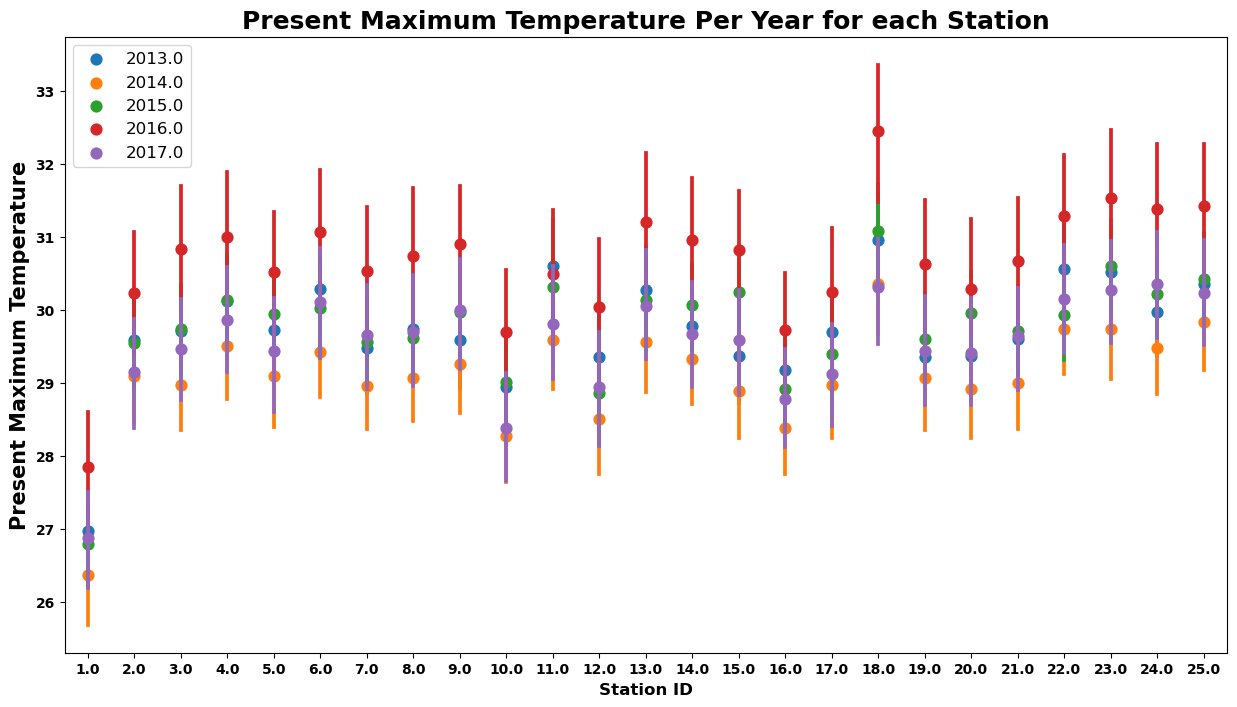

In [29]:
#Line Plot of Present Temperature Maximum over each Station
plt.figure(figsize=(15,8))
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=18, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':12,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=10,fontweight ='bold')
plt.yticks(fontsize=10,fontweight ='bold')
plt.legend(fontsize=12)
plt.show()

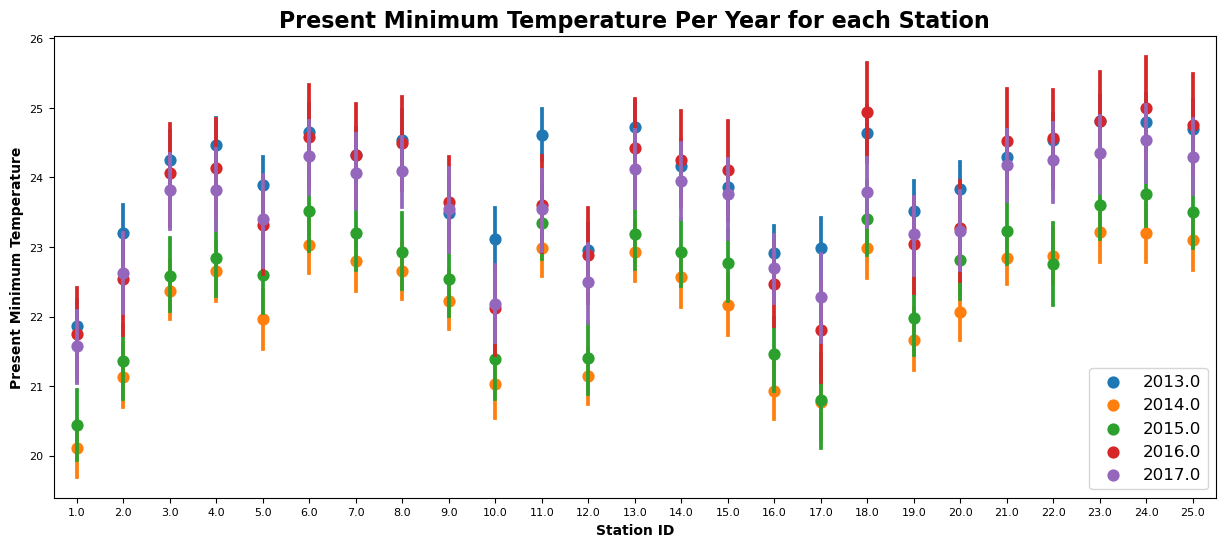

In [30]:
# Line Plot of Present Temperature Minimum over each Station
plt.figure(figsize=(15,6))

sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=16, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':10,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':10,'fontweight' :'bold'})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=12)
plt.show()

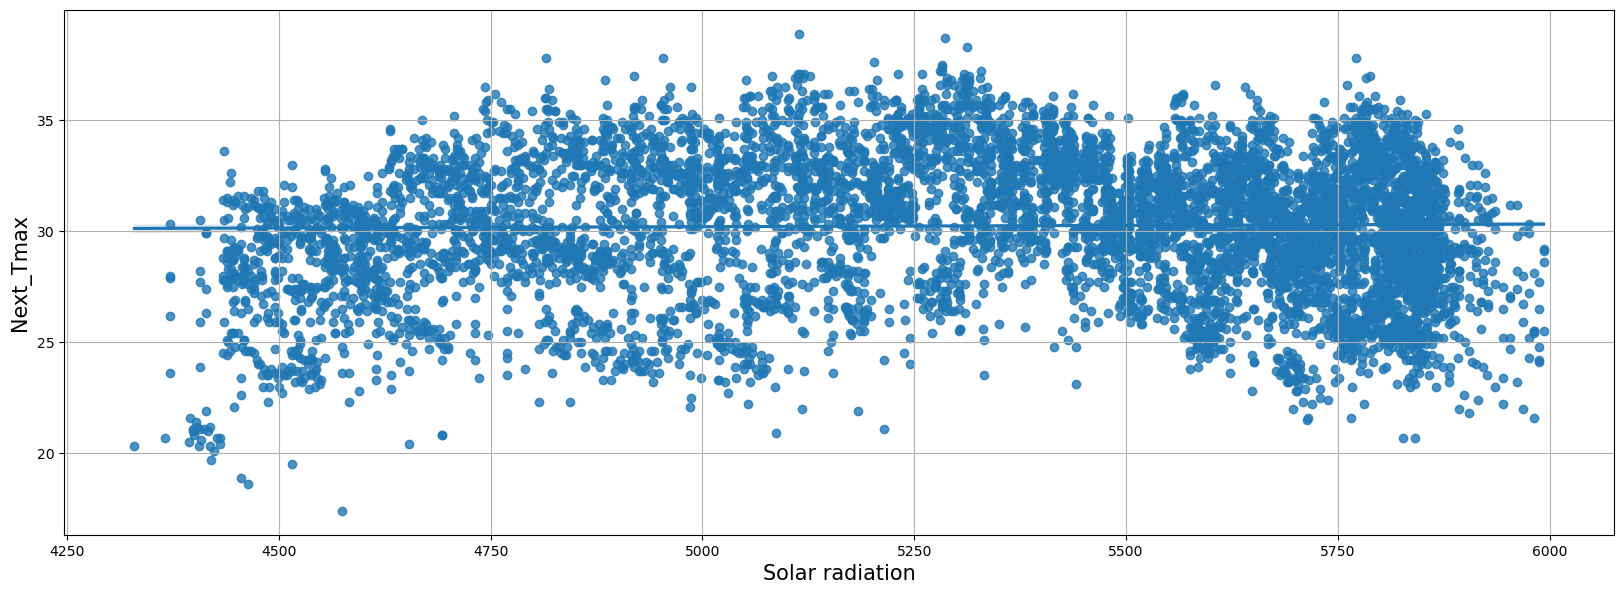

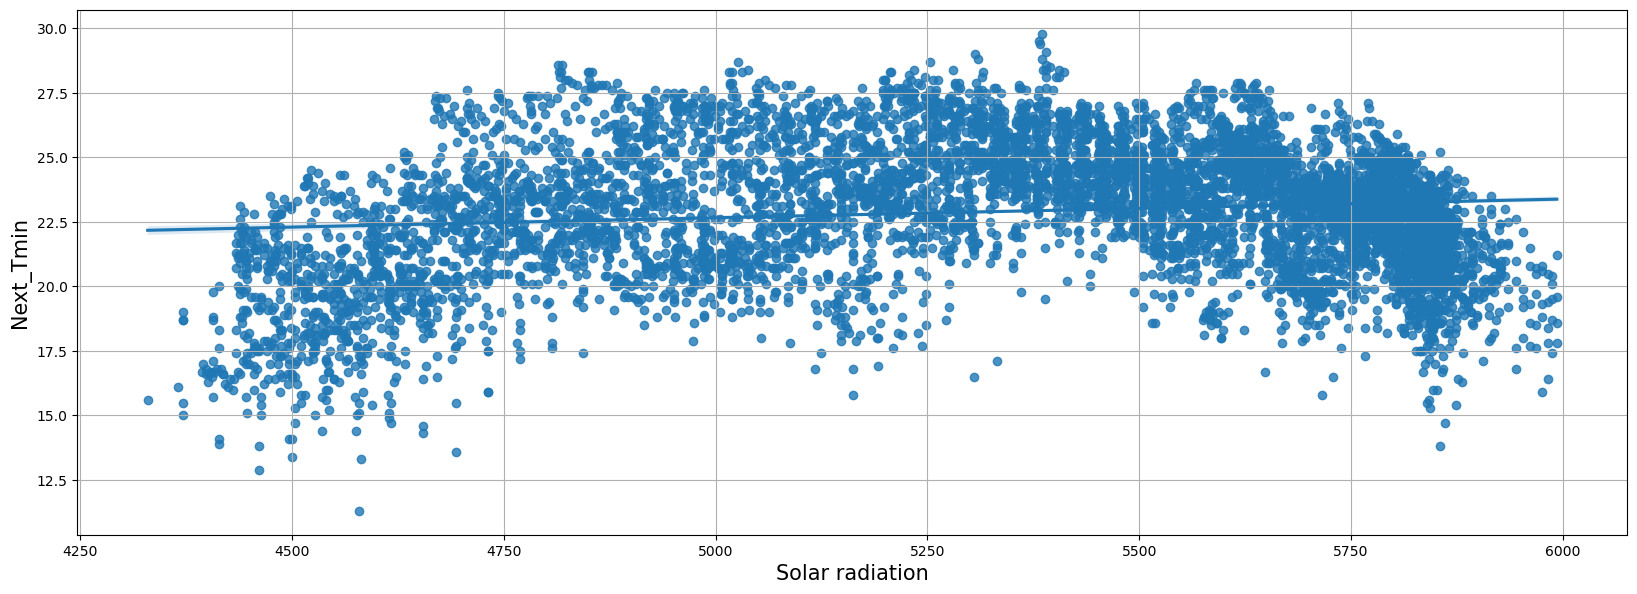

In [31]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.regplot(x='Solar radiation', y='Next_Tmax', data= df )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.regplot(x='Solar radiation', y='Next_Tmin', data= df )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

<Axes: xlabel='station', ylabel='Next_Tmin'>

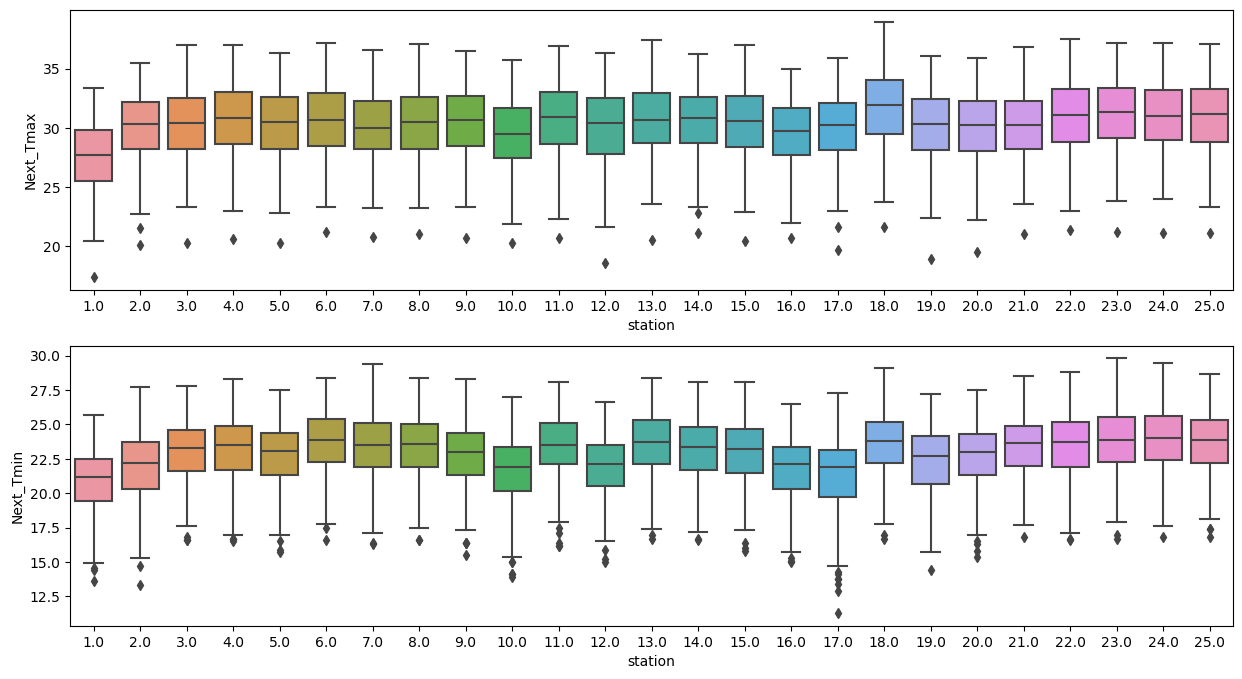

In [32]:
#Ploting wrt to station
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=df)

plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=df)

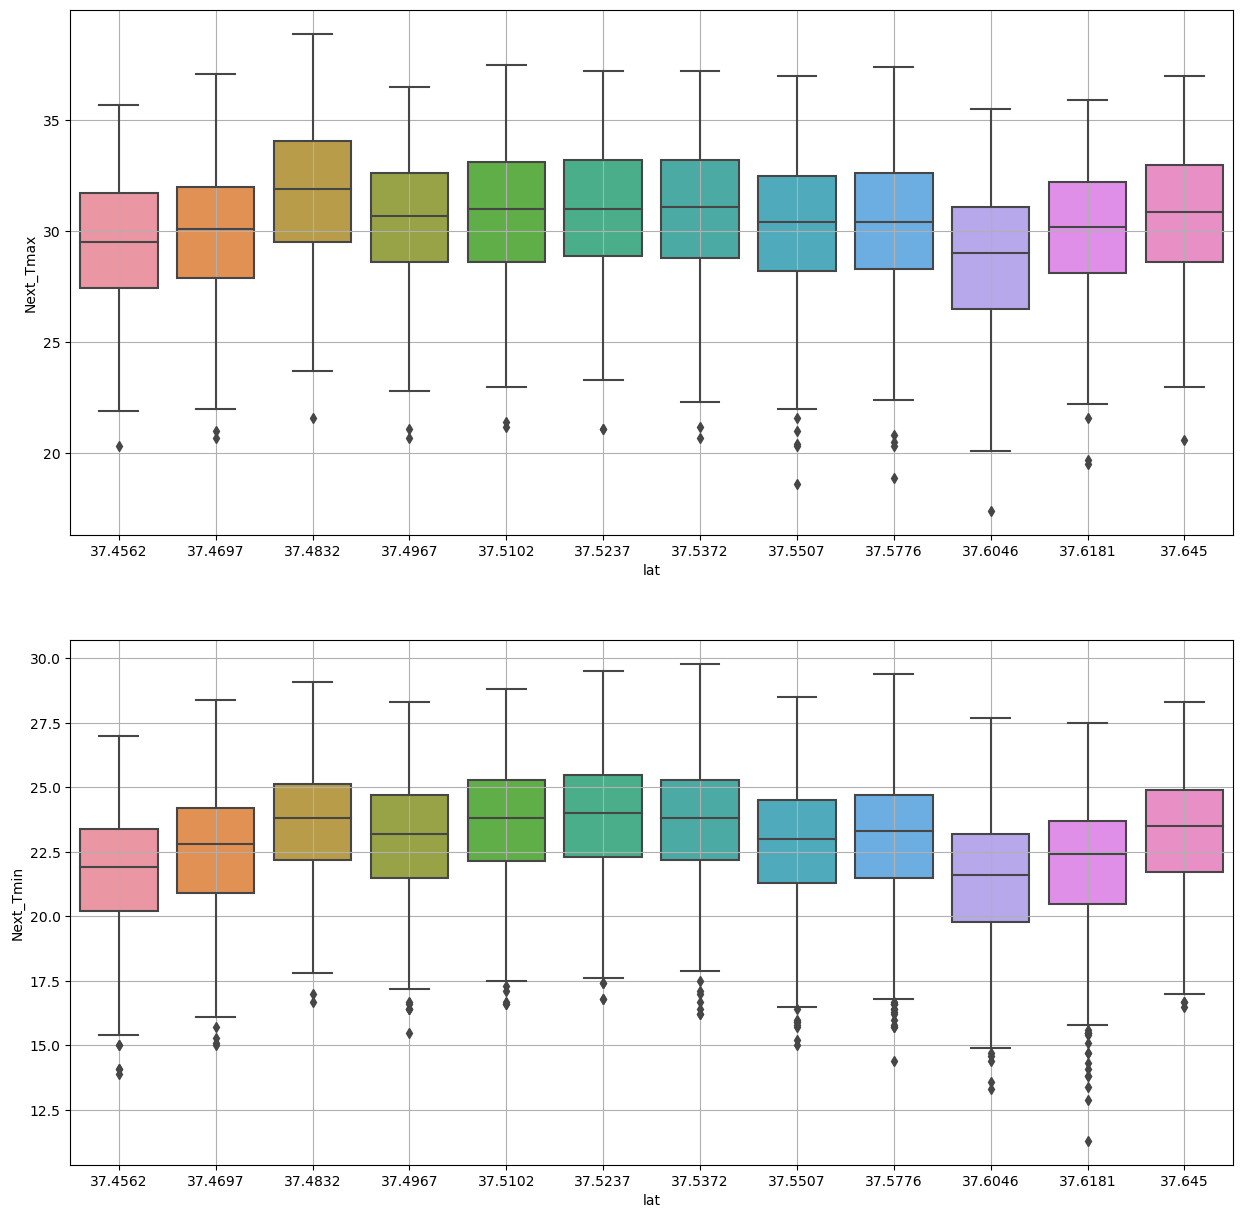

In [33]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=df)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=df)
plt.grid(True)

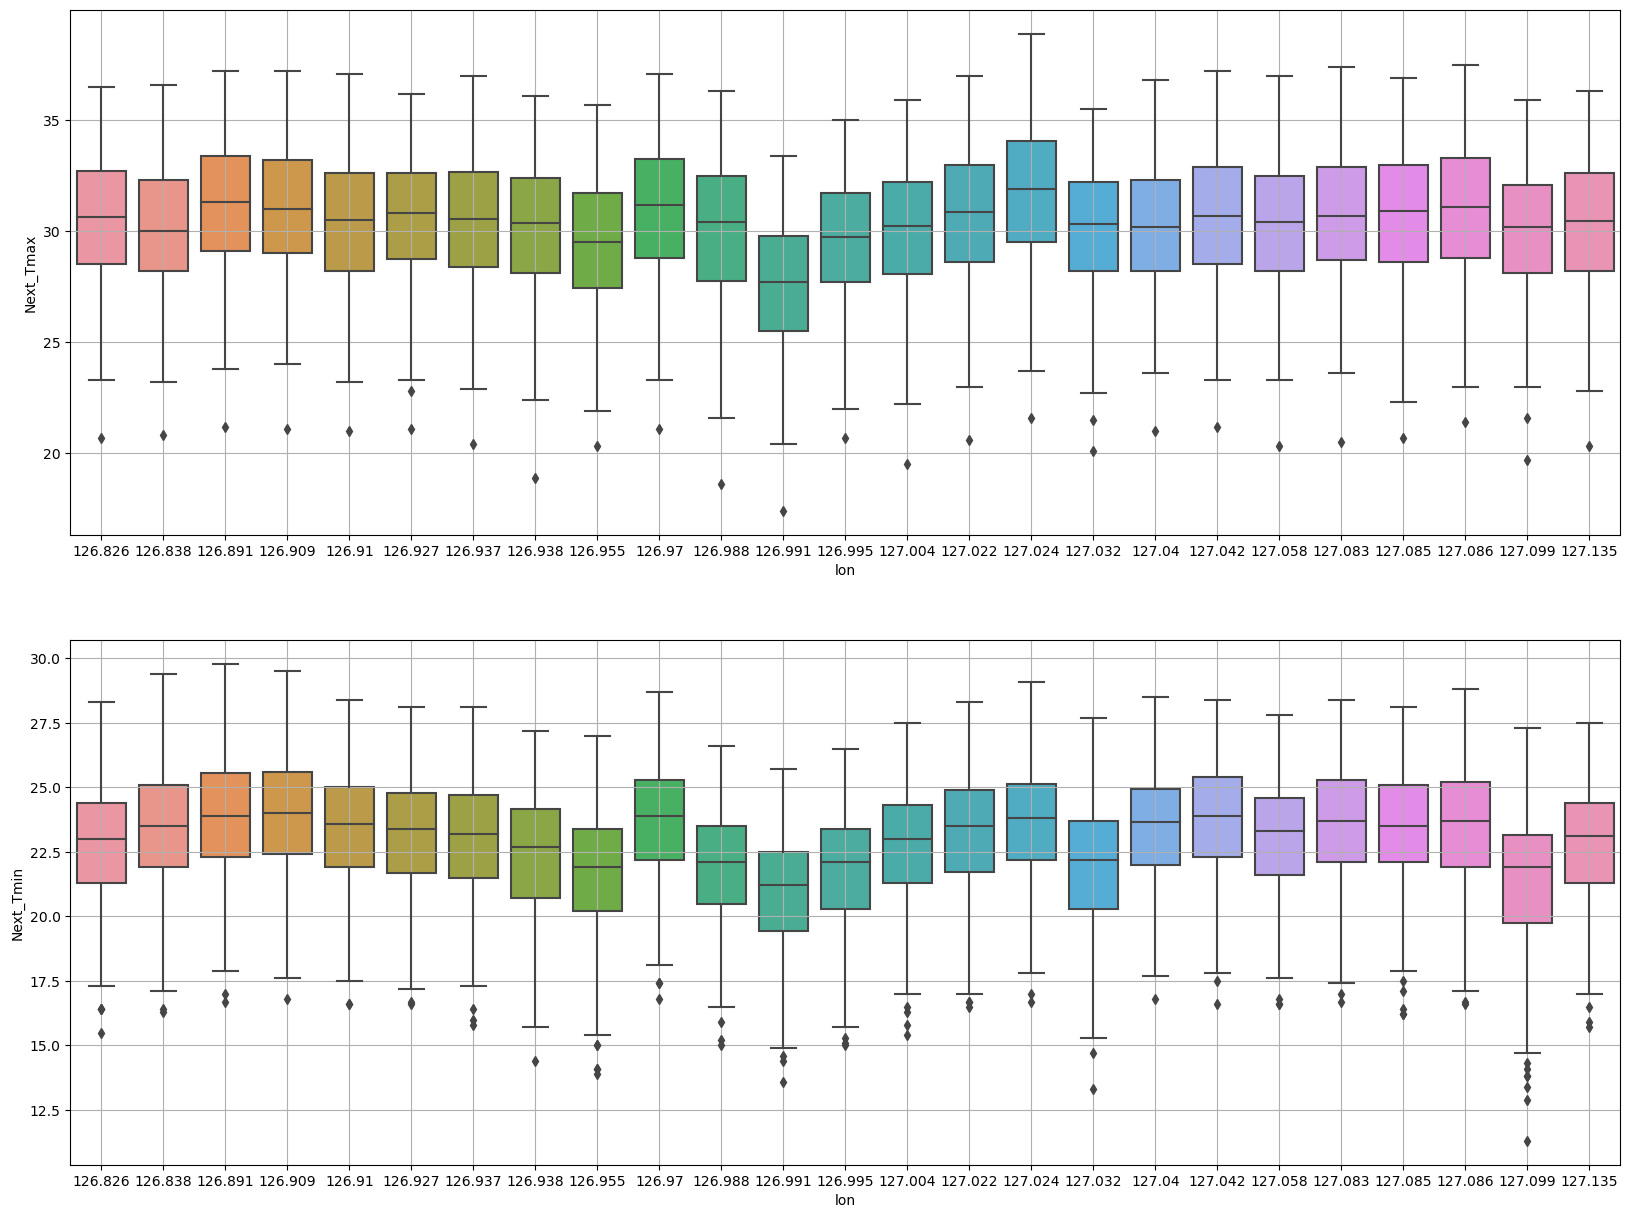

In [34]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=df)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=df)
plt.grid(True)

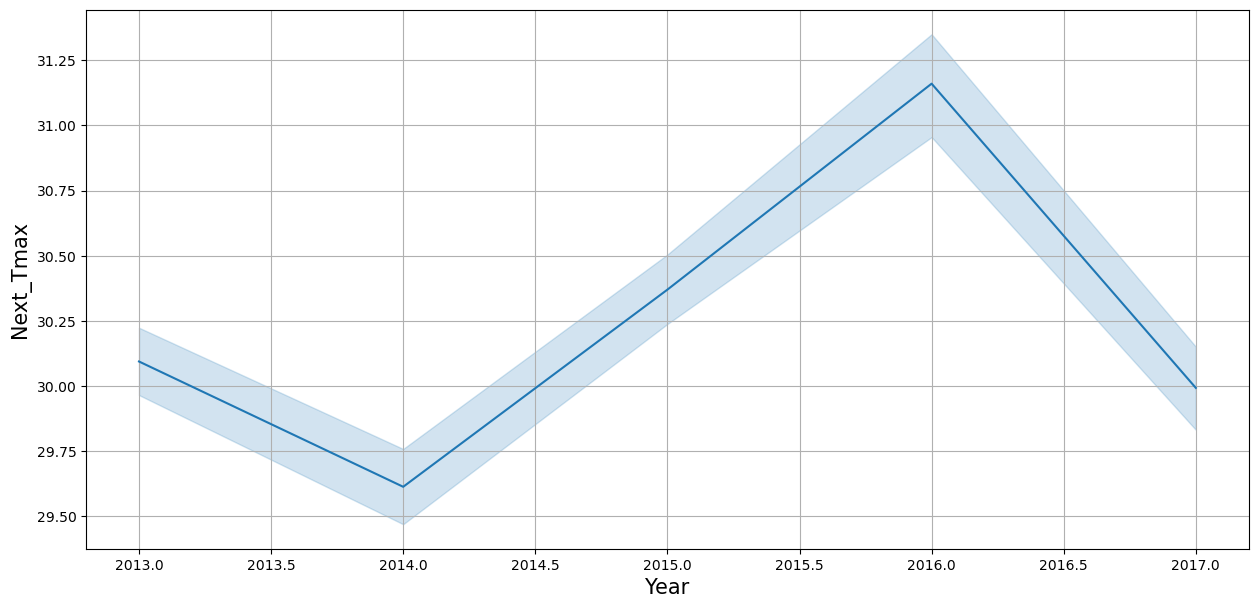

In [35]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Next_Tmax', data= df)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

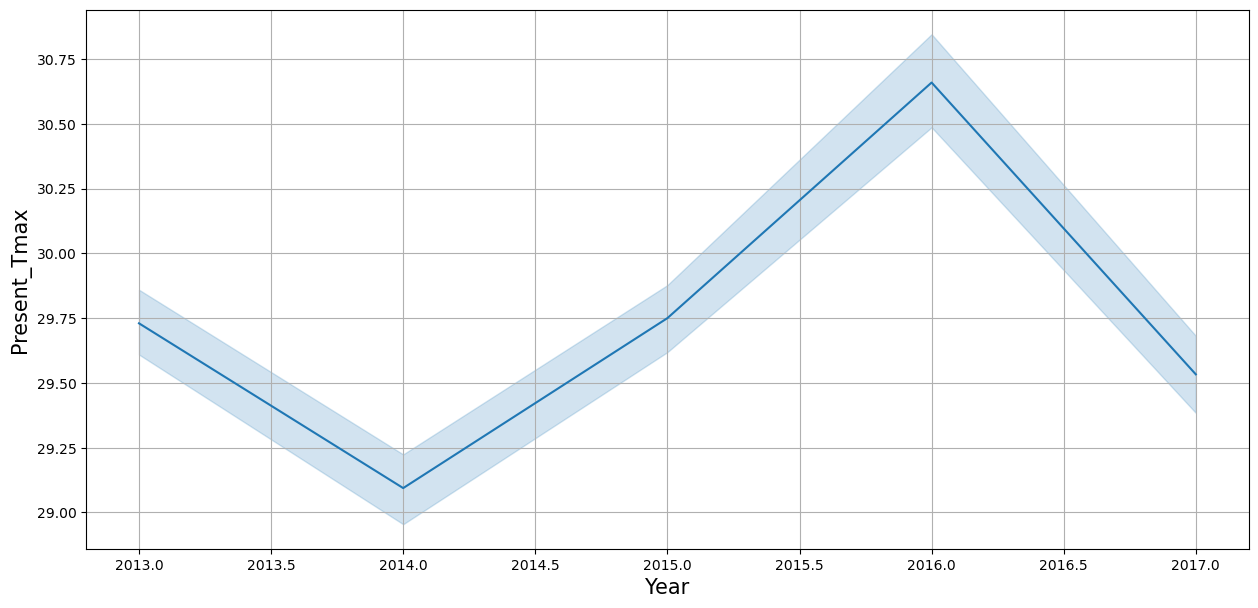

In [36]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Present_Tmax', data= df)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Present_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

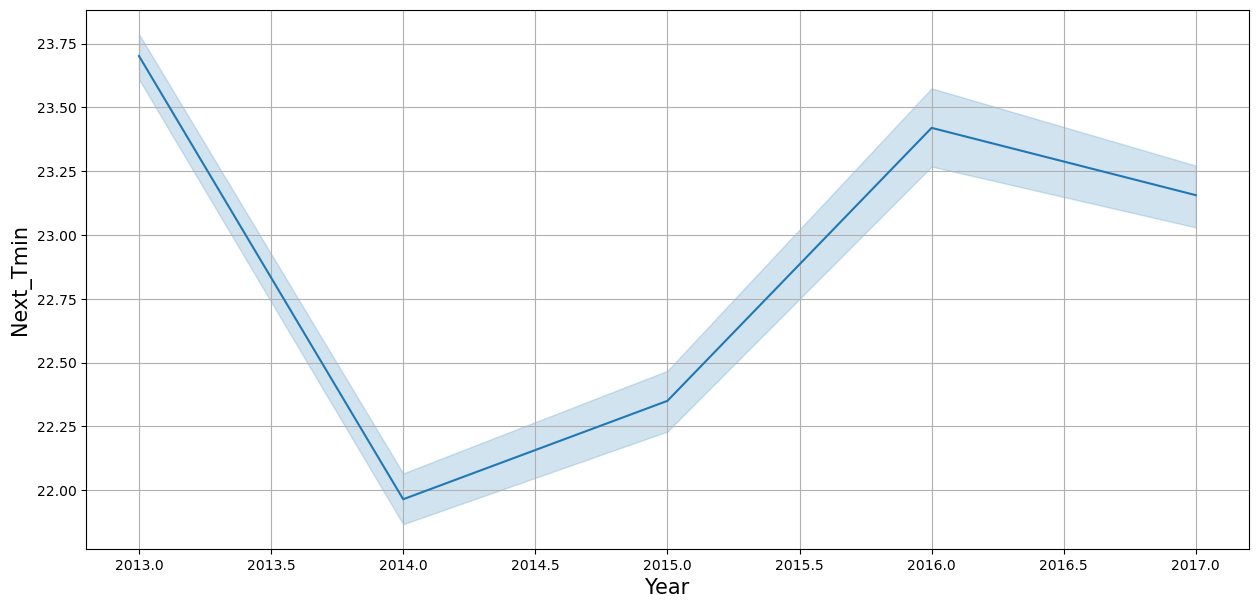

In [37]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Next_Tmin', data= df)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

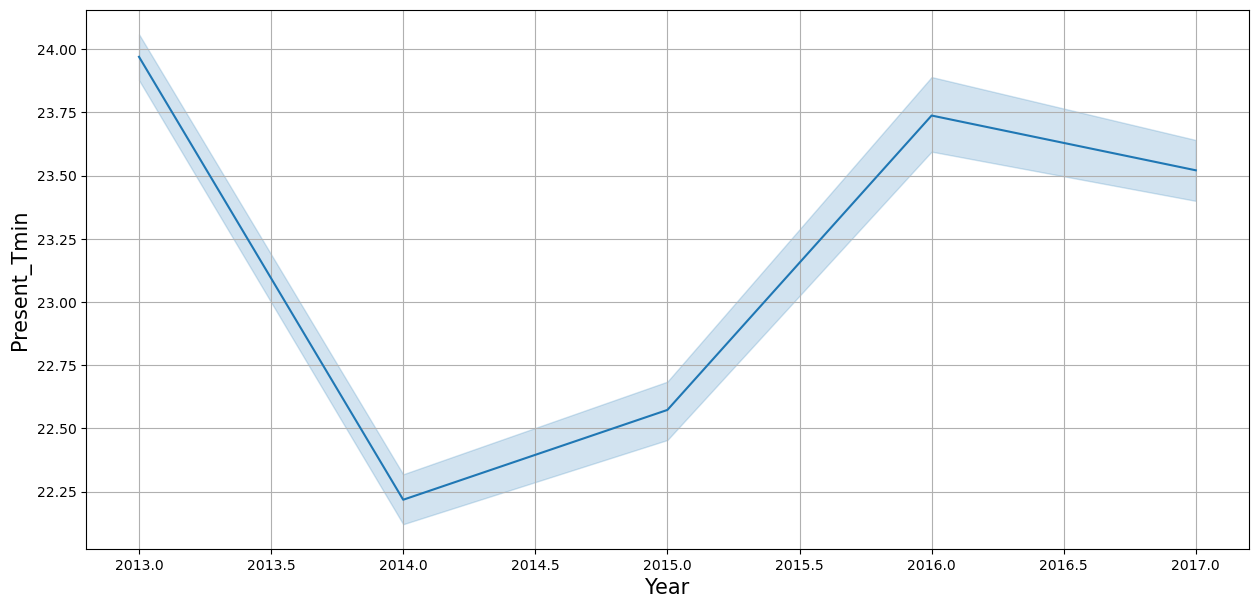

In [38]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Present_Tmin', data= df)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Present_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

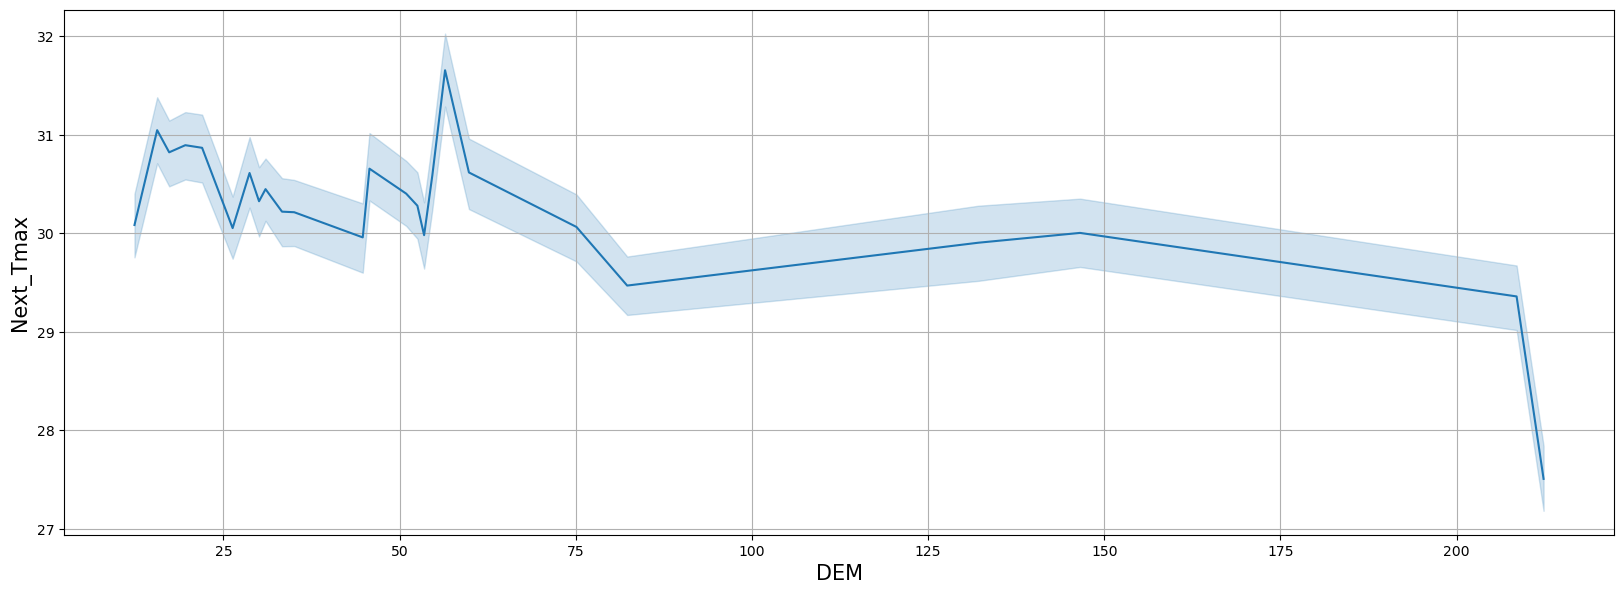

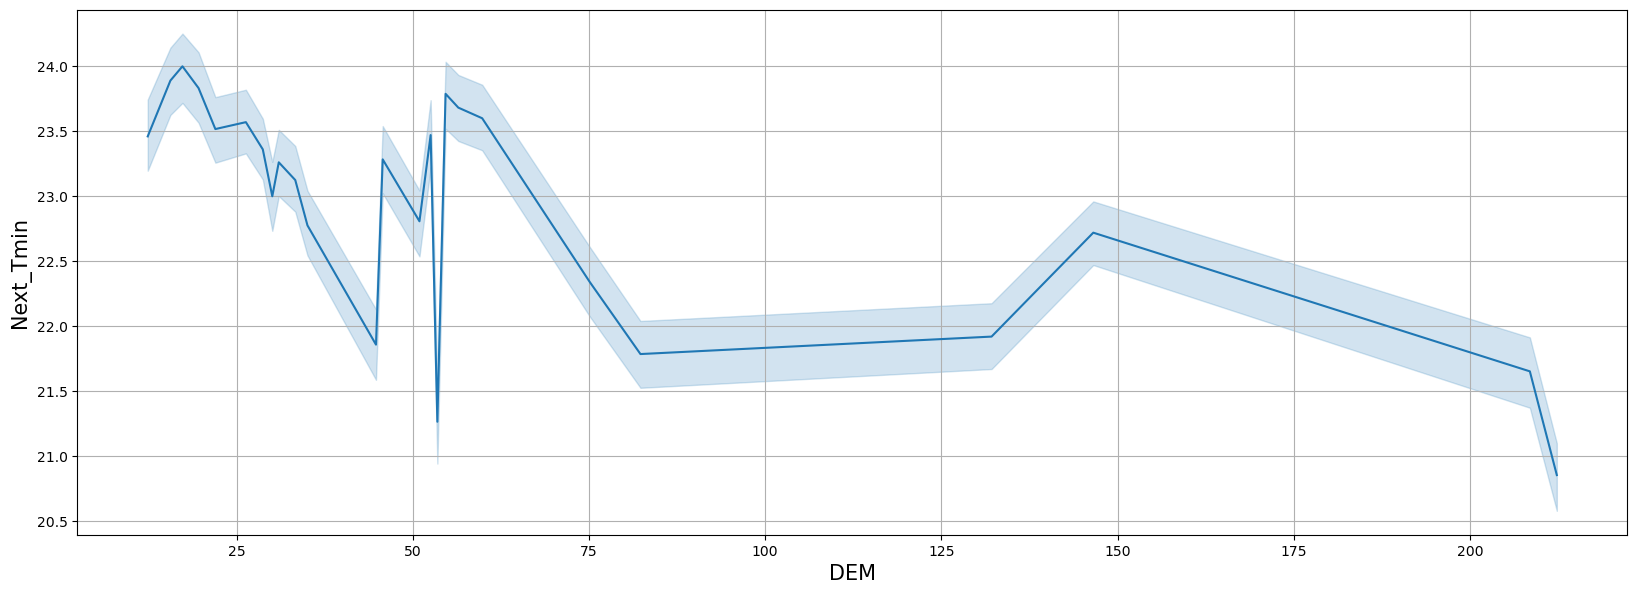

In [39]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(x='DEM', y='Next_Tmax', data= df )
plt.xlabel('DEM', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.lineplot(x='DEM', y='Next_Tmin', data= df )
plt.xlabel('DEM', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

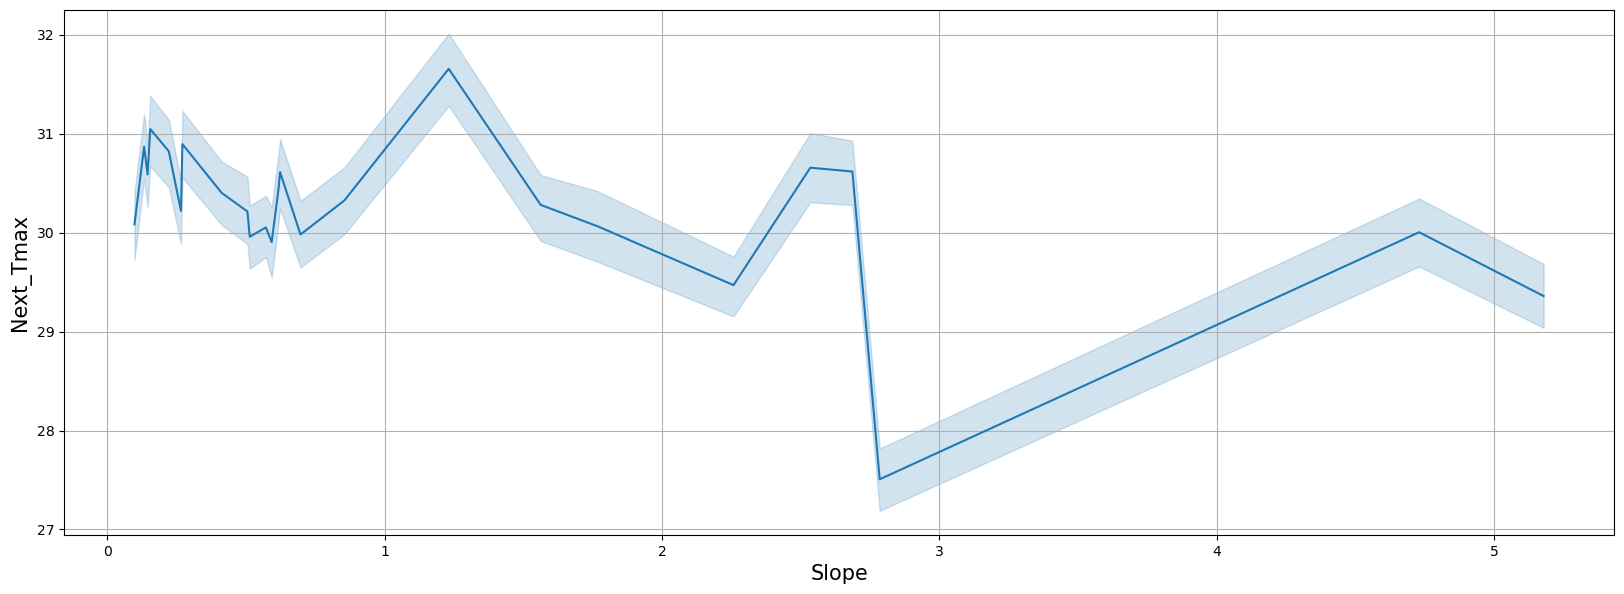

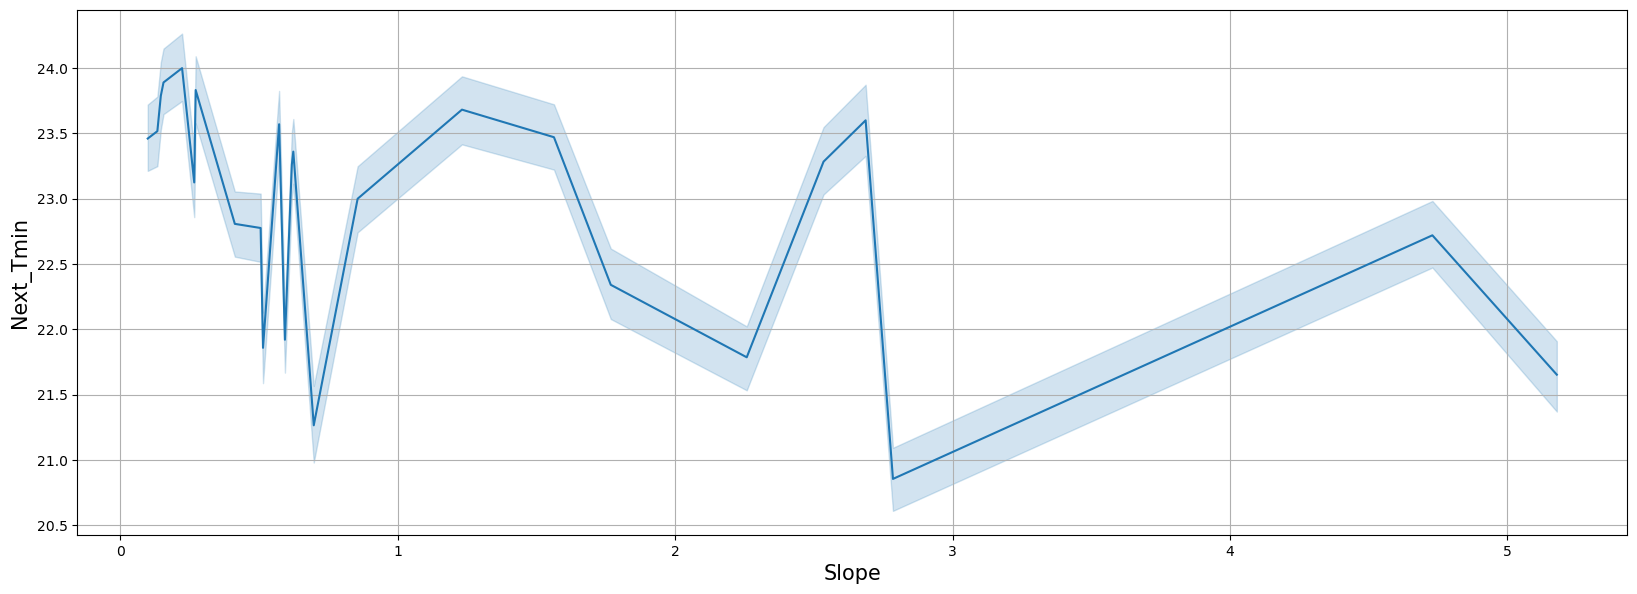

In [40]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(x='Slope', y='Next_Tmax', data= df)
plt.xlabel('Slope', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.lineplot(x='Slope', y='Next_Tmin', data= df)
plt.xlabel('Slope', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

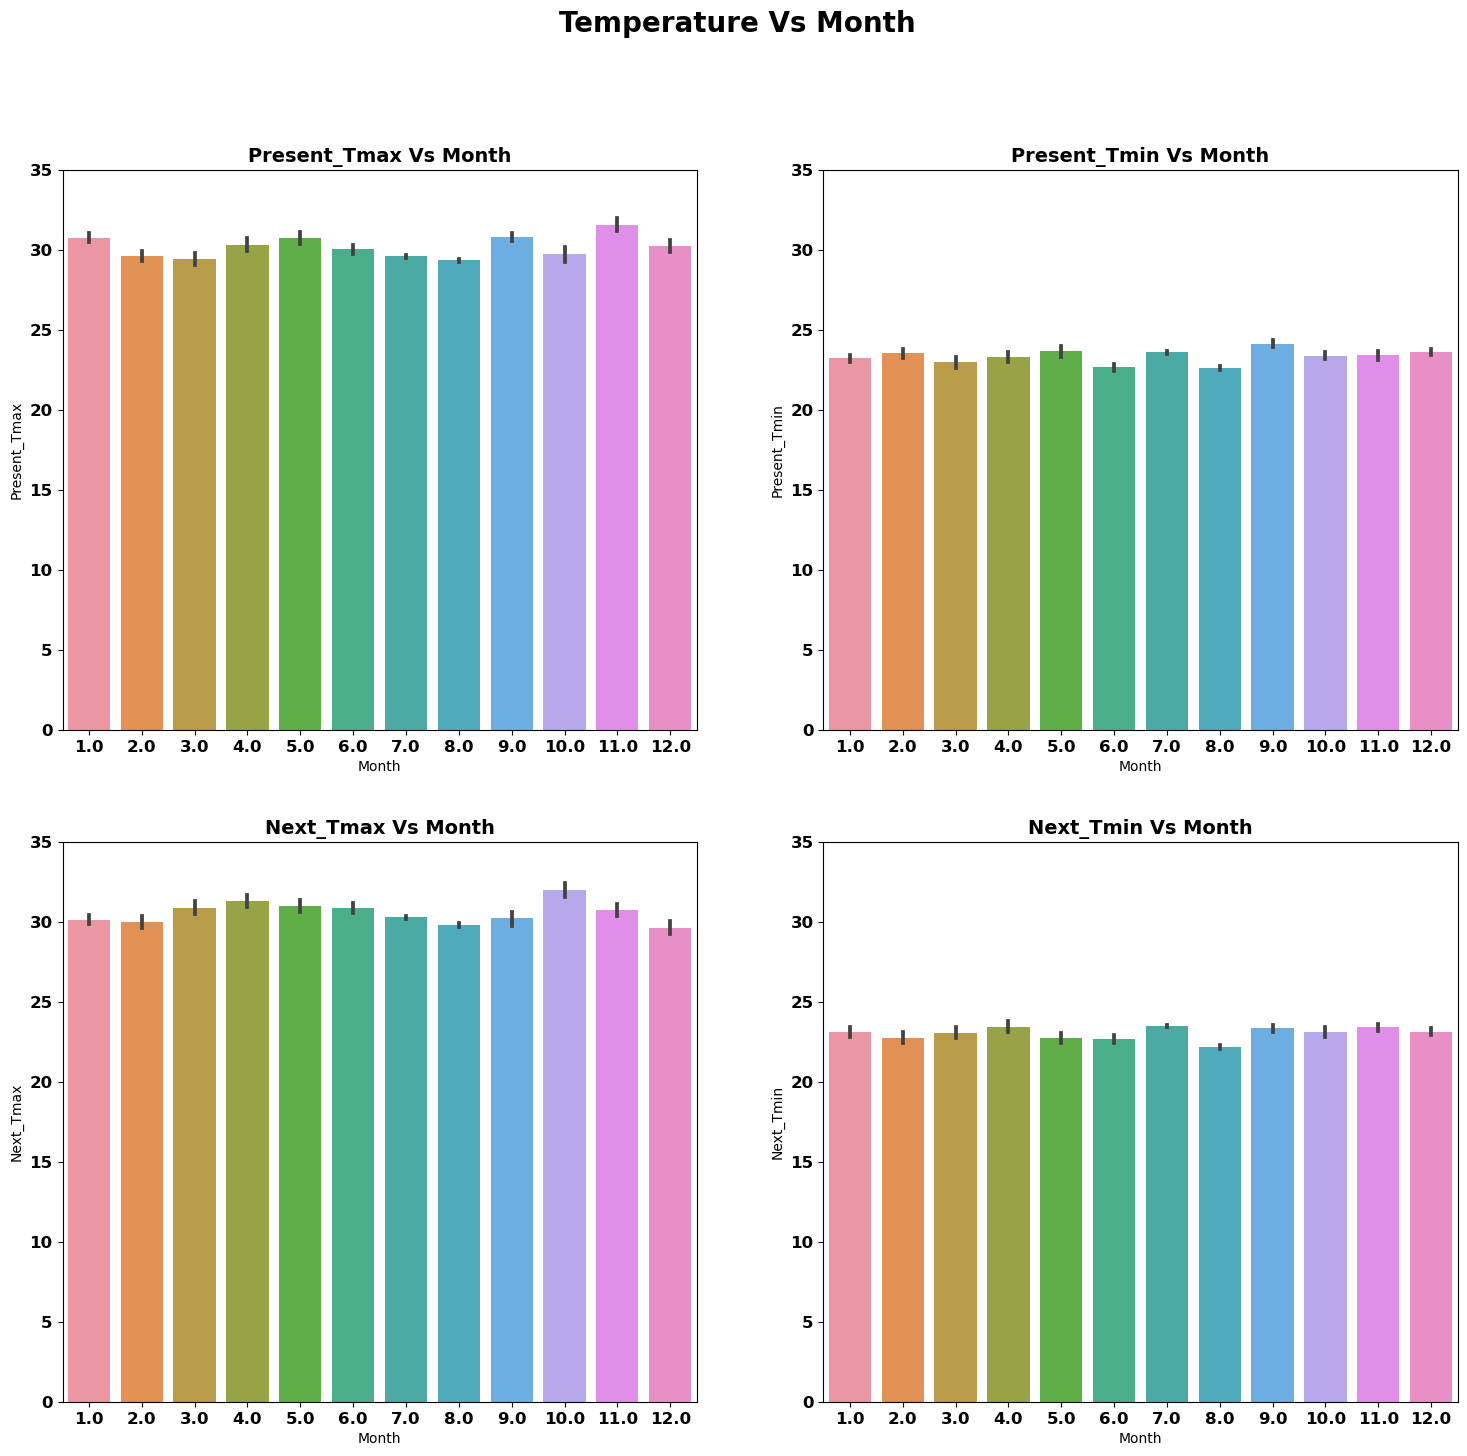

In [41]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

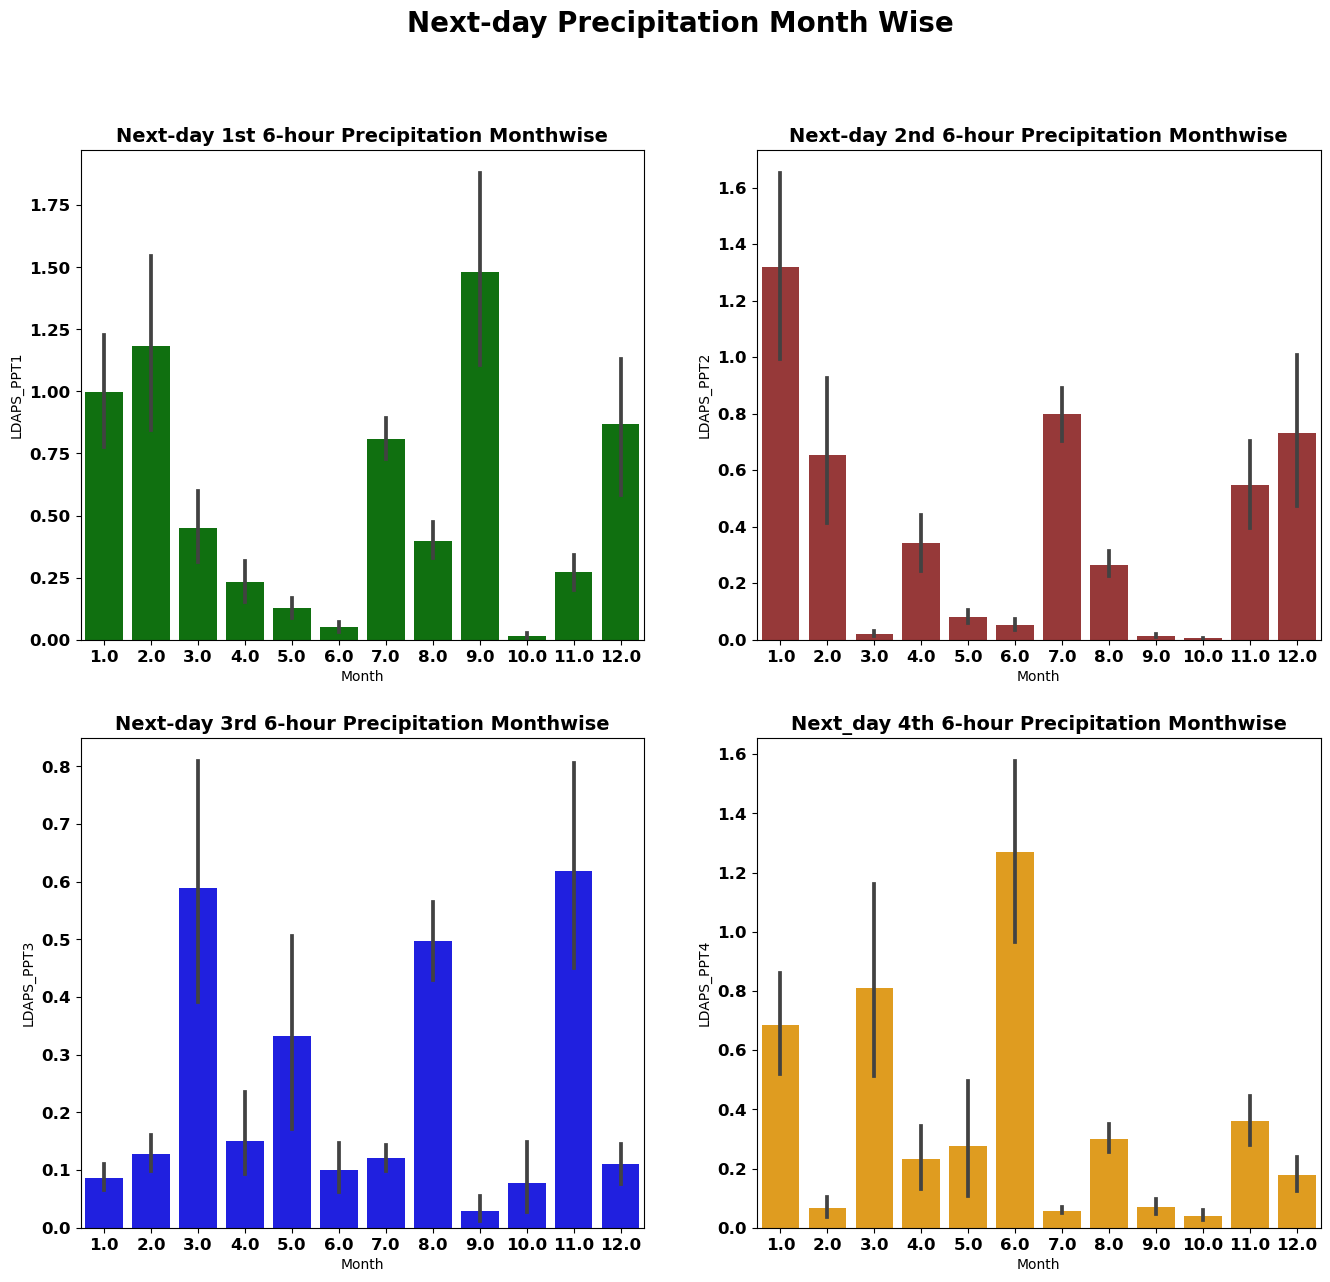

In [42]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df,color="green")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.0940966991598575 m/s


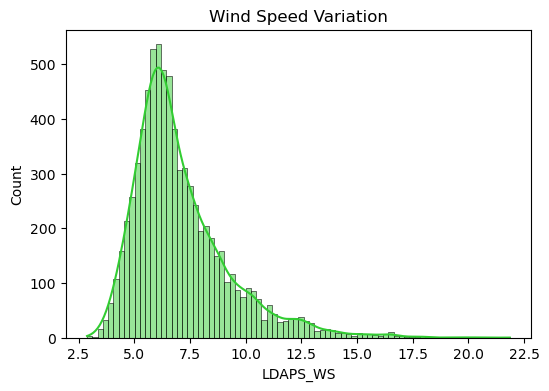

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


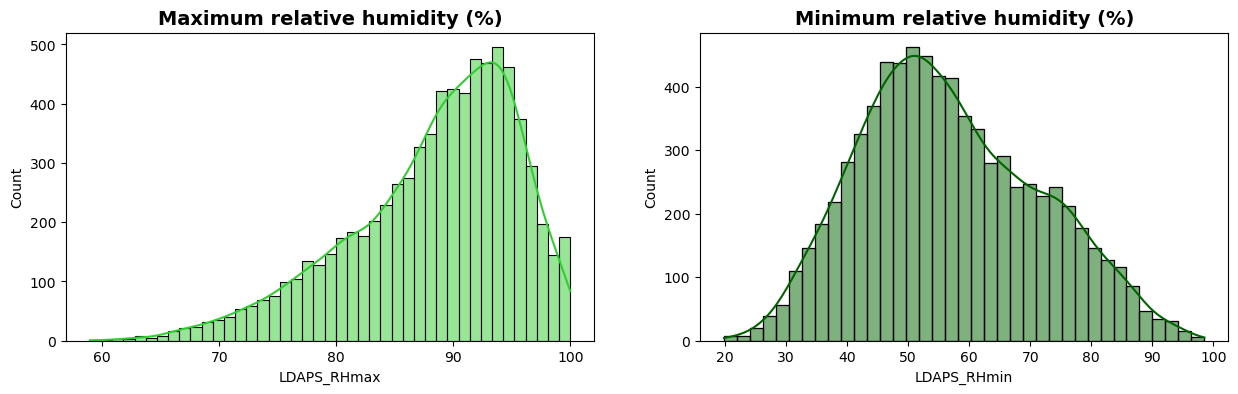

In [50]:
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))
#Visualizing it
plt.figure(figsize=(15,4))
#First Plot:
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='limegreen')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
# Second Plot:
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='darkgreen')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
plt.show()

# 5. Data Encoding

In [19]:
# Initiating Label Encoder
le=LabelEncoder()
# Columns need to be encoded
df['State'] = le.fit_transform(df['State'])
df['City'] = le.fit_transform(df['City'])
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year,State,City
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0,1,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0,1,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0,1,6
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0,1,6
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0,0,3


# 6. Outliers Detection And Removal

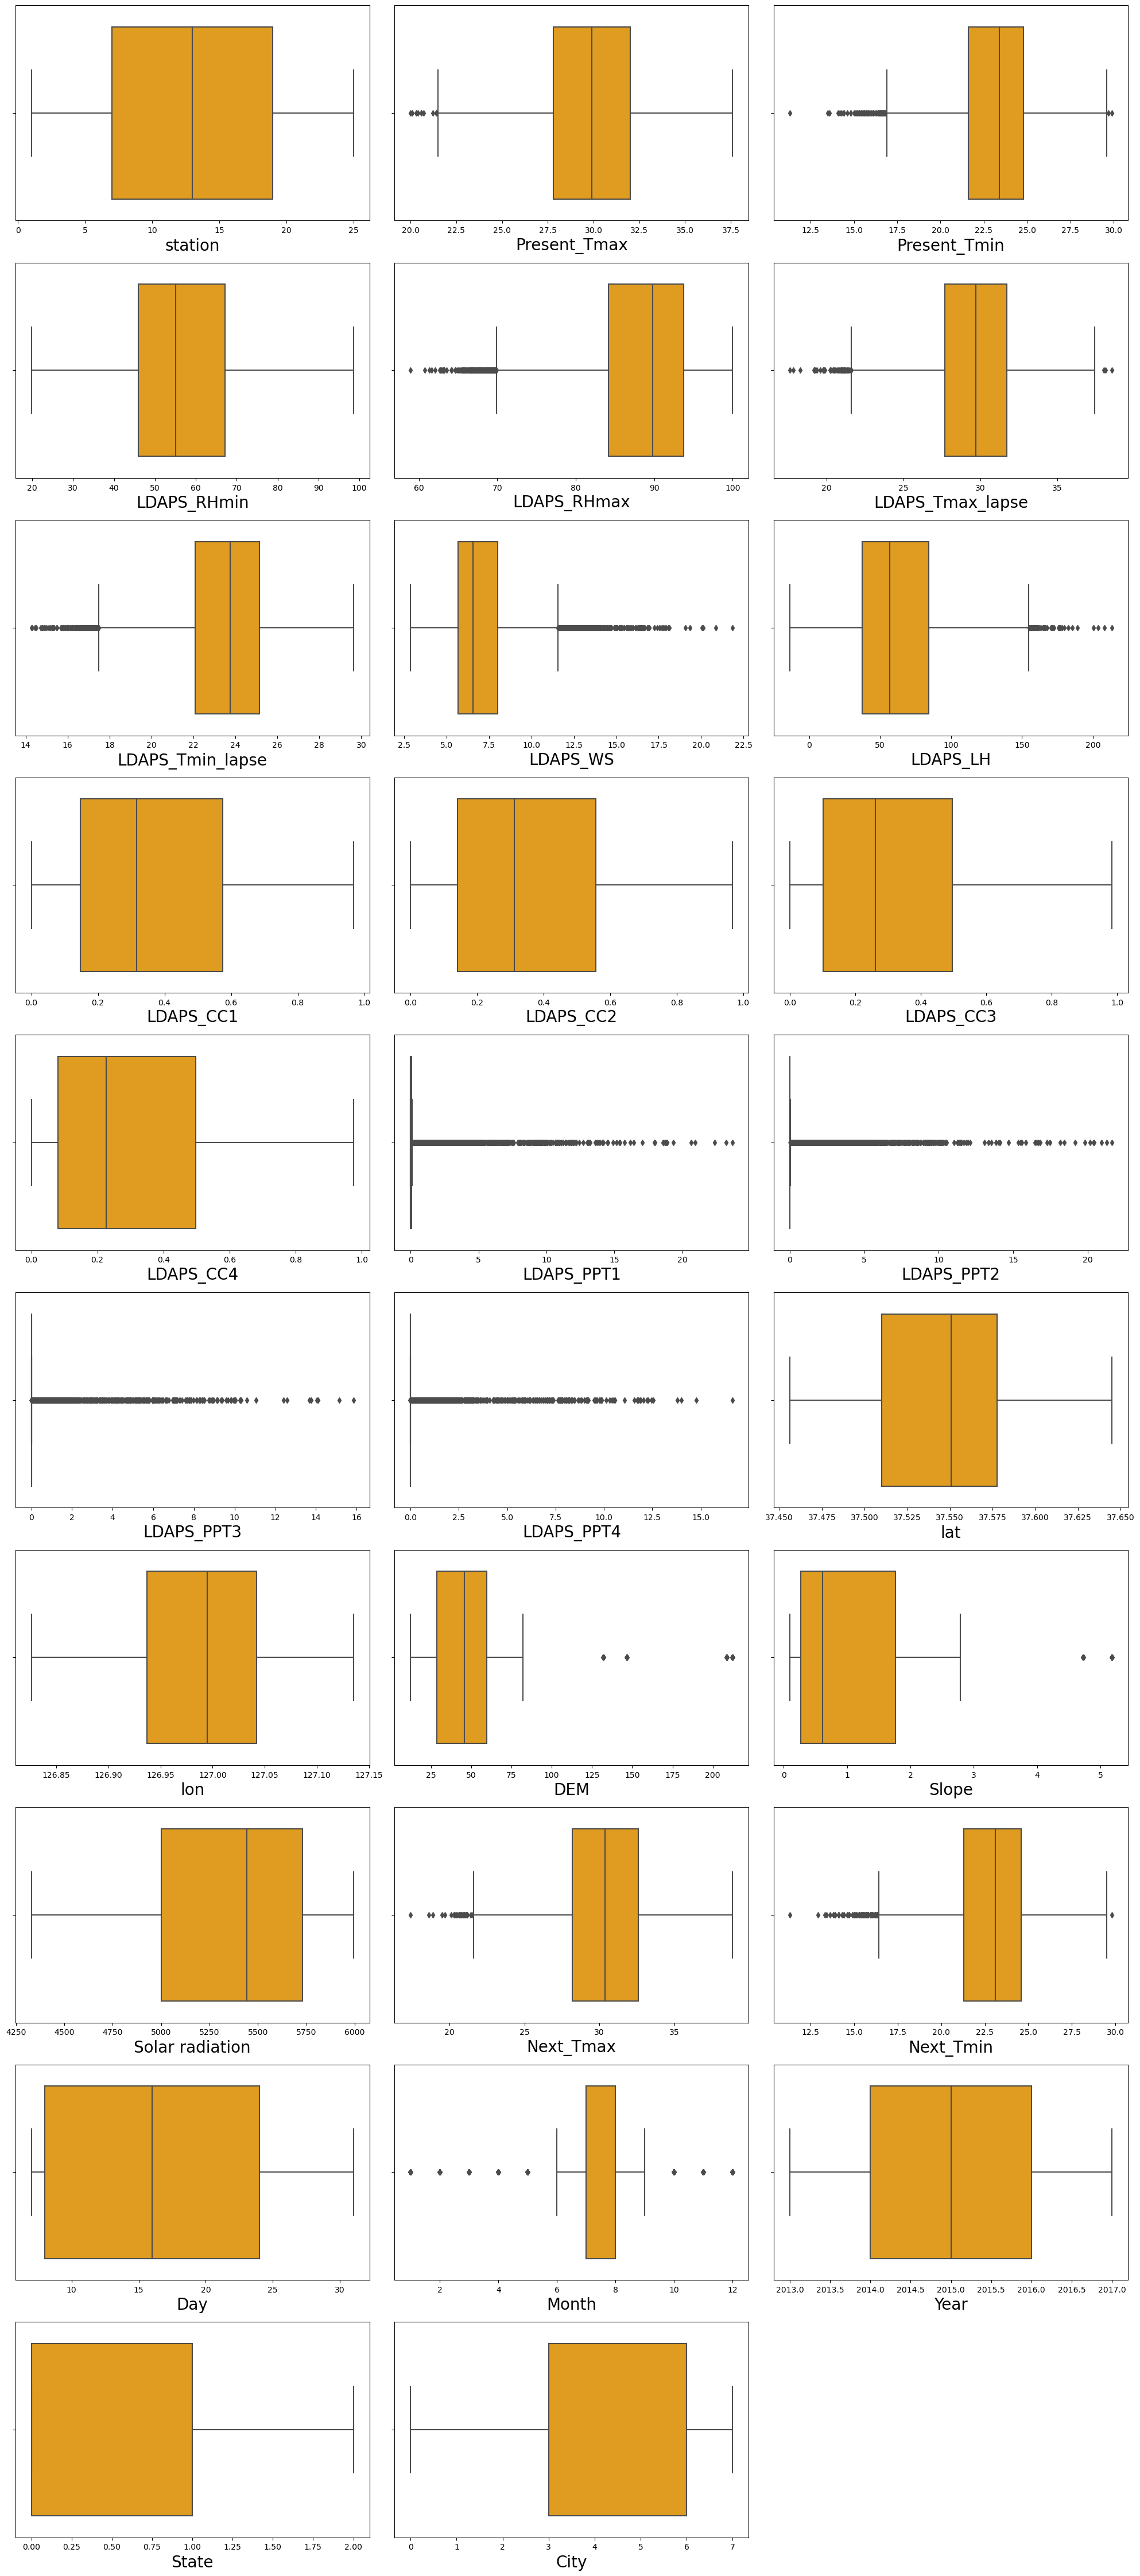

In [45]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(x=df[column],color='orange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [20]:
# Removing outlier using Zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)
Percentage of data loss post outlier removal:  11.188719030047443


In [21]:
df=df1.copy()

# 6. Skewness

In [48]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

In [22]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']
# Iniating Scaler
scaler = PowerTransformer(method='yeo-johnson')
# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

# 7. Correlation of Target Variables With other Feature variables

In [23]:
df1 = df.copy()

In [24]:
correlation_with_target = df.corr()['Next_Tmax'].abs().sort_values(ascending=False)
print(correlation_with_target)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.816861
Present_Tmax        0.586943
Next_Tmin           0.580951
LDAPS_Tmin_lapse    0.550810
LDAPS_CC2           0.484796
LDAPS_CC3           0.464998
LDAPS_CC1           0.453763
Present_Tmin        0.438813
LDAPS_RHmin         0.433872
LDAPS_CC4           0.415827
LDAPS_PPT2          0.357330
LDAPS_PPT1          0.347241
LDAPS_RHmax         0.323446
LDAPS_PPT3          0.268024
LDAPS_PPT4          0.217651
LDAPS_WS            0.205979
LDAPS_LH            0.151784
DEM                 0.117146
station             0.106378
Day                 0.105005
Year                0.101615
Slope               0.084174
Solar radiation     0.061064
State               0.054571
lat                 0.048616
City                0.025503
Month               0.016328
lon                 0.010567
Name: Next_Tmax, dtype: float64


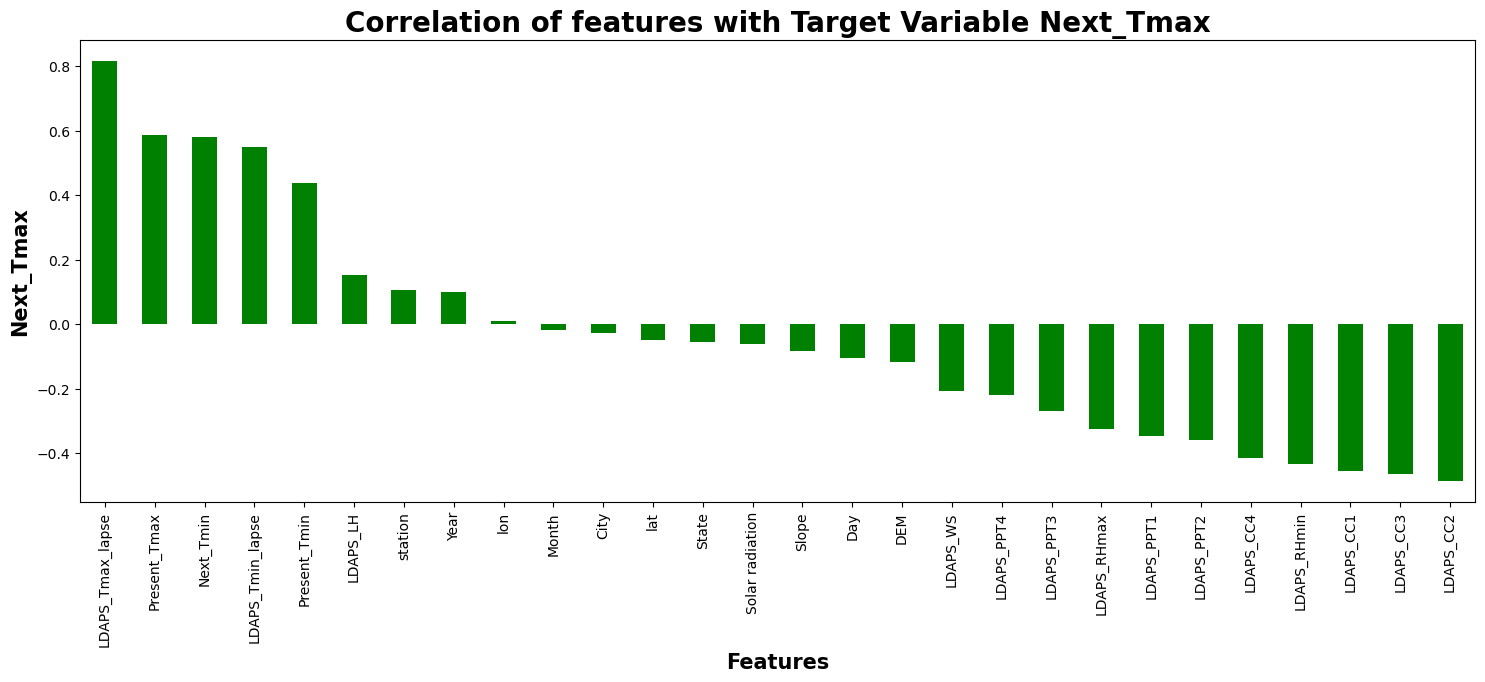

In [52]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'green')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

In [25]:
correlation_with_target = df1.corr()['Next_Tmin'].abs().sort_values(ascending=False)
print(correlation_with_target)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.873678
Present_Tmin        0.785946
Present_Tmax        0.615950
Next_Tmax           0.580951
LDAPS_Tmax_lapse    0.553227
DEM                 0.238249
Slope               0.158030
LDAPS_RHmin         0.134518
station             0.129110
LDAPS_RHmax         0.110402
LDAPS_PPT4          0.100787
Day                 0.099202
State               0.091937
LDAPS_CC2           0.078871
lat                 0.076705
Year                0.069291
LDAPS_PPT1          0.053093
LDAPS_LH            0.052365
lon                 0.041574
City                0.038001
LDAPS_PPT3          0.029908
Month               0.029336
LDAPS_CC4           0.026091
LDAPS_WS            0.023330
LDAPS_CC3           0.021743
Solar radiation     0.012532
LDAPS_CC1           0.008400
LDAPS_PPT2          0.006710
Name: Next_Tmin, dtype: float64


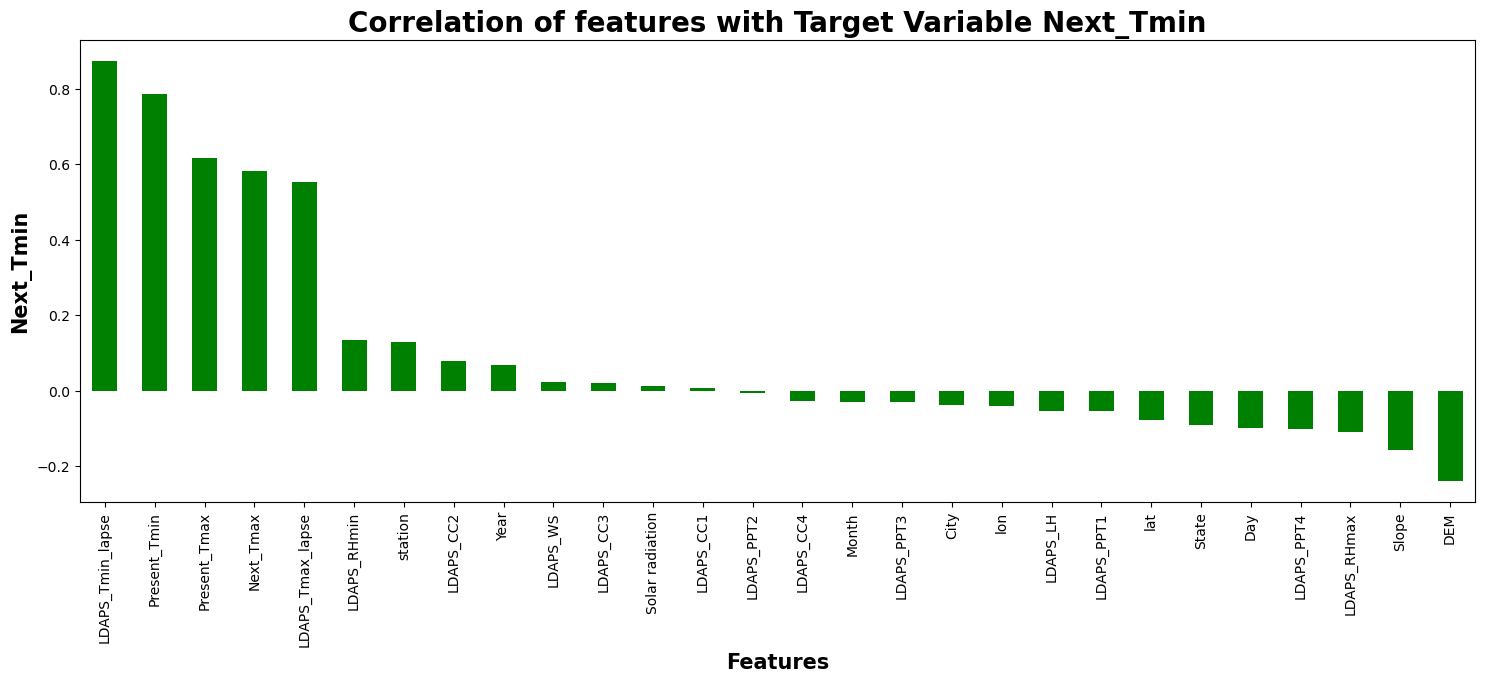

In [54]:
plt.figure(figsize = (18,6))
df1.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'green')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

# 8. Splitting of Data into Train Testing Validation

In [26]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [27]:
# Splitting data in target and dependent feature
X1 = df1.drop(['Next_Tmin'], axis =1)
Y1 = df1['Next_Tmin']

# 9. Feature Engineering

In [28]:
#Instantiate Standard Scaler
scaler= StandardScaler()
# Fit and transform the scaler on the features
X_scale = scaler.fit_transform(X)
# Create a DataFrame view of the scaled features after preprocessing
scaled_df = pd.DataFrame(X_scale, columns=X.columns)
scaled_df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lon,DEM,Slope,Solar radiation,Next_Tmin,Day,Month,Year,State,City
0,-1.672719,-0.425704,-0.814460,0.195915,0.348222,-0.662498,-0.357311,0.176871,0.349992,-0.440130,...,0.002925,1.854393,1.327776,1.891687,-0.790587,1.674045,-0.575810,-1.421473,0.868781,0.790184
1,-1.533959,0.690215,-0.727785,-0.236604,0.261118,-0.016693,0.109008,-0.574617,-0.166810,-0.473686,...,0.518733,0.069704,-0.375858,1.431077,-0.239151,1.674045,-0.575810,-1.421473,0.868781,0.790184
2,-1.395198,0.585598,0.008945,-0.494494,-0.717348,0.070769,0.361065,-0.252083,-1.378337,-0.537958,...,0.845830,-0.353433,-0.944115,1.410511,0.354704,1.674045,-0.575810,-1.421473,0.868781,0.790184
3,-1.256438,0.725088,0.052282,0.194767,1.375094,-0.069787,-0.215595,-0.606795,0.245926,-0.510012,...,0.392926,0.098766,1.249133,1.387059,0.524376,1.674045,-0.575810,-1.421473,0.868781,0.790184
4,-1.117678,0.515853,-0.597774,0.045667,0.186035,-0.284509,-0.143389,-0.541825,1.298111,-0.768323,...,1.814542,-0.278815,-0.392364,1.396254,-0.239151,1.674045,-0.575810,-1.421473,-1.025949,-0.893893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1.102482,-2.378563,-2.374595,-2.226900,-1.363447,-0.757521,-2.135504,0.048293,-2.013062,-1.159992,...,0.619378,-0.712912,-0.269357,-1.763704,-2.275223,1.674045,0.364102,1.442938,2.763511,1.351543
6735,1.241243,-2.587798,-2.547943,-1.836710,-0.753410,-1.160213,-2.288364,-0.516916,0.685720,-1.106080,...,1.198089,-0.999559,-1.353609,-1.781247,-2.529732,1.674045,0.364102,1.442938,2.763511,1.351543
6736,1.380003,-2.308818,-2.677955,-2.078766,-1.302260,-1.288468,-1.982204,-0.244791,0.421213,-1.250919,...,-1.255142,-1.576584,-1.278502,-1.779394,-2.105550,1.674045,0.364102,1.442938,2.763511,1.351543
6737,1.518763,-2.308818,-2.417932,-2.273699,-1.457152,-1.049238,-1.996101,0.011101,-0.319269,-1.227700,...,-1.028689,-1.397502,-1.069018,-1.785446,-1.808623,1.674045,0.364102,1.442938,2.763511,1.351543


In [29]:
#Instantiate Standard Scaler
scaler= StandardScaler()
# Fit and transform the scaler on the features
X1_scale = scaler.fit_transform(X1)
# Create a DataFrame view of the scaled features after preprocessing
scaled_df1 = pd.DataFrame(X1_scale, columns=X1.columns)
scaled_df1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Day,Month,Year,State,City
0,-1.672719,-0.425704,-0.814460,0.195915,0.348222,-0.662498,-0.357311,0.176871,0.349992,-0.440130,...,0.002925,1.854393,1.327776,1.891687,-0.489951,1.674045,-0.575810,-1.421473,0.868781,0.790184
1,-1.533959,0.690215,-0.727785,-0.236604,0.261118,-0.016693,0.109008,-0.574617,-0.166810,-0.473686,...,0.518733,0.069704,-0.375858,1.431077,-0.011135,1.674045,-0.575810,-1.421473,0.868781,0.790184
2,-1.395198,0.585598,0.008945,-0.494494,-0.717348,0.070769,0.361065,-0.252083,-1.378337,-0.537958,...,0.845830,-0.353433,-0.944115,1.410511,0.194072,1.674045,-0.575810,-1.421473,0.868781,0.790184
3,-1.256438,0.725088,0.052282,0.194767,1.375094,-0.069787,-0.215595,-0.606795,0.245926,-0.510012,...,0.392926,0.098766,1.249133,1.387059,0.399279,1.674045,-0.575810,-1.421473,0.868781,0.790184
4,-1.117678,0.515853,-0.597774,0.045667,0.186035,-0.284509,-0.143389,-0.541825,1.298111,-0.768323,...,1.814542,-0.278815,-0.392364,1.396254,0.228274,1.674045,-0.575810,-1.421473,-1.025949,-0.893893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1.102482,-2.378563,-2.374595,-2.226900,-1.363447,-0.757521,-2.135504,0.048293,-2.013062,-1.159992,...,0.619378,-0.712912,-0.269357,-1.763704,-1.002969,1.674045,0.364102,1.442938,2.763511,1.351543
6735,1.241243,-2.587798,-2.547943,-1.836710,-0.753410,-1.160213,-2.288364,-0.516916,0.685720,-1.106080,...,1.198089,-0.999559,-1.353609,-1.781247,-0.866164,1.674045,0.364102,1.442938,2.763511,1.351543
6736,1.380003,-2.308818,-2.677955,-2.078766,-1.302260,-1.288468,-1.982204,-0.244791,0.421213,-1.250919,...,-1.255142,-1.576584,-1.278502,-1.779394,-0.763561,1.674045,0.364102,1.442938,2.763511,1.351543
6737,1.518763,-2.308818,-2.417932,-2.273699,-1.457152,-1.049238,-1.996101,0.011101,-0.319269,-1.227700,...,-1.028689,-1.397502,-1.069018,-1.785446,-0.660957,1.674045,0.364102,1.442938,2.763511,1.351543


# 10. Multicolinearity

In [30]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.353177,station
1,2.849784,Present_Tmax
2,3.383435,Present_Tmin
3,6.077961,LDAPS_RHmin
4,2.614712,LDAPS_RHmax
5,6.650091,LDAPS_Tmax_lapse
6,8.235731,LDAPS_Tmin_lapse
7,1.225322,LDAPS_WS
8,1.523389,LDAPS_LH
9,4.874106,LDAPS_CC1


In [31]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1_scale,i) for i in range(len(X1.columns))]
vif["Features"] = X1.columns
vif

,VIF values,Features
0,1.366467,station
1,2.924486,Present_Tmax
2,3.139690,Present_Tmin
3,6.029785,LDAPS_RHmin
4,2.600589,LDAPS_RHmax
5,7.964586,LDAPS_Tmax_lapse
6,6.637268,LDAPS_Tmin_lapse
7,1.235664,LDAPS_WS
8,1.557633,LDAPS_LH
9,4.879330,LDAPS_CC1


In [32]:
X.shape


(6739, 28)

In [33]:
Y.shape
Y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6739, dtype: float64

In [34]:
X1.shape

(6739, 28)

In [35]:
# Create PCA objects for each dataset
pca1 = PCA()
pca2 = PCA()
# Perform PCA for the first dataset (X_scale)
x_pca = pca1.fit_transform(X_scale)
# Perform PCA for the second dataset (X1_scale)
x1_pca = pca2.fit_transform(X1_scale)

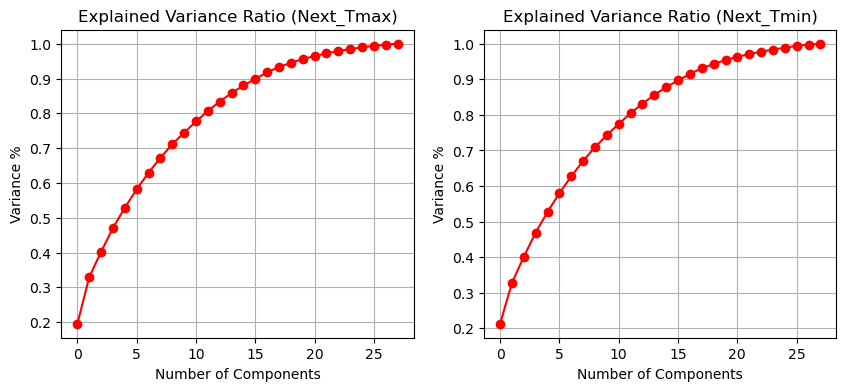

In [48]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca1.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio (Next_Tmax)')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca2.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio (Next_Tmin)')
plt.grid()
plt.show()

In [36]:
pca = PCA(n_components=25)
x_new = pca.fit_transform(X_scale)
principle_x = pd.DataFrame(x_new)
principle_x

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.008548,2.760090,-2.212330,-1.024492,0.513860,-0.351439,-0.368094,-0.445283,0.243323,0.464083,...,0.065290,1.774617,0.834956,0.281978,0.466234,-0.017015,0.267178,0.442345,-0.085481,-0.068924
1,-0.894611,1.099074,-0.826062,-0.893431,0.986752,0.322954,0.925648,-1.188821,0.645629,0.393706,...,0.069169,1.712573,0.608738,0.728744,0.449627,-0.441921,-0.361936,0.060873,-0.291627,-0.056056
2,-1.252525,0.006859,0.134553,-1.124689,0.946914,-0.206741,0.468691,-2.035902,1.002790,0.438880,...,-0.347911,1.551935,0.688917,1.006165,0.318938,-0.048484,-0.012565,0.067961,-0.180432,-0.148233
3,-0.518259,0.945434,-2.266122,-0.897946,0.842317,0.914820,0.708309,-0.758006,0.306951,0.463567,...,0.311805,1.540000,0.586020,0.820310,0.135636,0.292667,-0.313614,-0.693272,-0.235399,-0.133397
4,-0.760375,0.918102,-0.990284,1.448738,-0.068828,0.661462,1.100483,-0.804618,0.767588,-0.313113,...,-0.765659,1.565420,0.591273,0.600822,0.284103,-0.226385,0.136154,-0.256819,-0.246389,-0.073569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,-2.409743,5.008952,3.473254,-1.894889,1.144270,0.210467,-0.498575,-1.411097,0.521322,-1.288139,...,-0.569031,-0.360889,-0.641876,0.121321,-0.117880,-0.149240,0.170203,-0.210860,-0.420408,-0.645685
6735,-2.139230,5.328755,3.548822,-1.444546,1.598982,1.137316,0.892995,0.058507,0.228046,-1.819133,...,-1.180985,-0.324560,-0.619540,-0.452243,-0.009264,-0.383103,0.359051,0.248575,-0.411442,-0.650008
6736,-2.374455,4.740525,4.327342,-1.223045,1.943389,0.841564,0.446968,0.929871,-0.275508,-1.068885,...,-0.036632,-0.089138,-0.375933,-0.741333,0.430351,-0.542093,0.340947,-0.093705,-0.414864,-0.662698
6737,-2.538827,4.445202,4.333803,-1.389158,1.833439,0.497994,-0.130944,0.511439,-0.052077,-1.150520,...,-0.226095,-0.159383,-0.447531,-0.581440,0.261459,-0.354168,0.256311,-0.189660,-0.390428,-0.652760


In [37]:
pca = PCA(n_components=25)
x1_new = pca.fit_transform(X1_scale)
principle_x1 = pd.DataFrame(x1_new)
principle_x1

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.132661,2.902161,-1.885136,-1.095007,-0.507004,-0.403476,-0.328544,-0.447890,0.312654,0.182071,...,-0.529167,1.519404,-1.003105,0.323176,0.471856,-0.183343,-0.384707,0.399539,0.097992,-0.064631
1,-0.846146,1.229102,-0.605208,-0.897985,-0.988225,0.370825,0.879930,-1.215602,0.713548,0.106340,...,-0.495041,1.491184,-0.773900,0.706058,0.522920,0.388268,0.186149,0.473724,-0.270293,-0.048768
2,-1.200907,0.279122,0.397514,-1.049544,-0.943289,-0.204038,0.459483,-2.035297,1.085543,0.126837,...,-0.807539,1.274280,-0.838115,0.970994,0.430455,0.132466,0.031913,0.073372,0.083177,-0.196291
3,-0.562858,1.395080,-1.992956,-0.990886,-0.826258,0.932214,0.665504,-0.780596,0.396211,0.126342,...,-0.237342,1.328687,-0.752043,0.875450,0.224334,-0.126590,0.526441,-0.347962,-0.444413,-0.142835
4,-0.810272,0.884204,-1.092163,1.376353,0.091916,0.685898,1.075712,-0.814907,0.833211,-0.541405,...,-1.198947,1.303170,-0.700290,0.530874,0.352142,0.243520,-0.160675,-0.094333,-0.390741,-0.060186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,-1.981530,4.615059,3.946399,-1.343920,-1.038352,0.086625,-0.338964,-1.256242,0.579269,-1.247379,...,-0.294284,-0.392591,0.662500,0.197515,-0.093397,0.076981,-0.130818,0.034091,-0.265122,-0.693433
6735,-1.797546,4.746036,3.861663,-0.904810,-1.497437,1.126851,1.024283,0.197782,0.282724,-1.722841,...,-0.872506,-0.383268,0.686917,-0.438139,-0.051653,0.177793,-0.480441,0.314354,-0.010134,-0.714927
6736,-2.017021,4.272473,4.644694,-0.594586,-1.819771,0.784444,0.666239,1.086548,-0.188873,-1.071548,...,0.190590,0.101139,0.448001,-0.697441,0.361394,0.215120,-0.430124,0.304488,-0.259040,-0.707855
6737,-2.180040,4.091195,4.701739,-0.752330,-1.707246,0.398480,0.106519,0.687918,0.034606,-1.155371,...,0.046870,-0.013903,0.516195,-0.518151,0.214151,0.129108,-0.246942,0.148014,-0.156433,-0.724608


All the above VIF values for coressponding features of Next_Tmax and Next_Tmin respectively are below 10 and thus a collinearity is found and hence we can proceed with the modelling without any obstacles.

# 11.Model Selection For Best Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

best_random_state = None
best_mse = float('inf')

# Loop through different random states from 0 to 100
for random_state in range(101):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(principle_x, Y, test_size=0.2, random_state=random_state)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Update the best performing random state and its MSE if the current MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_random_state = random_state

print("Best performing random state:", best_random_state)
print("Best mean squared error:", best_mse)
print("R2 Score:", r2)

Best performing random state: 26
Best mean squared error: 1.7941628387848647
R2 Score: 0.7758936041958419


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

best_random_state = None
best_mse = float('inf')

# Loop through different random states from 0 to 100
for random_state in range(101):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(principle_x1, Y1, test_size=0.2, random_state=random_state)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Update the best performing random state and its MSE if the current MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_random_state = random_state

print("Best performing random state:", best_random_state)
print("Best mean squared error:", best_mse)
print("R2 Score:", r2)

Best performing random state: 89
Best mean squared error: 0.8266913226696176
R2 Score: 0.8276971564206932


In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

best_random_state = None
best_mse = float('inf')

# Loop through different random states from 0 to 100
for random_state in range(101):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(principle_x, Y, test_size=0.2, random_state=random_state)

    # Create a linear regression model
    model = Ridge(alpha=1.0)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Update the best performing random state and its MSE if the current MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_random_state = random_state

print("Best performing random state:", best_random_state)
print("Best mean squared error:", best_mse)
print("R2 Score:", r2)

Best performing random state: 26
Best mean squared error: 1.794178805726212
R2 Score: 0.775892250303358


In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

best_random_state = None
best_mse = float('inf')

# Loop through different random states from 0 to 100
for random_state in range(101):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(principle_x1, Y1, test_size=0.2, random_state=random_state)

    # Create a linear regression model
    model = Ridge(alpha=1.0)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Update the best performing random state and its MSE if the current MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_random_state = random_state

print("Best performing random state:", best_random_state)
print("Best mean squared error:", best_mse)
print("R2 Score:", r2)

Best performing random state: 89
Best mean squared error: 0.8266765004426868
R2 Score: 0.8277038656740947


In [41]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


best_random_state = None
best_mse = float('inf')

# Loop through different random states from 0 to 100
for random_state in range(101):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(principle_x, Y, test_size=0.2, random_state=random_state)

    # Create a linear regression model
    model = Lasso(alpha=1.0)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Update the best performing random state and its MSE if the current MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_random_state = random_state

print("Best performing random state:", best_random_state)
print("Best mean squared error:", best_mse)
print("R2 Score:", r2)

Best performing random state: 44
Best mean squared error: 3.0795613312492733
R2 Score: 0.6046282486635567


In [42]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


best_random_state = None
best_mse = float('inf')

# Loop through different random states from 0 to 100
for random_state in range(101):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(principle_x1, Y1, test_size=0.2, random_state=random_state)

    # Create a linear regression model
    model = Lasso(alpha=1.0)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Update the best performing random state and its MSE if the current MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_random_state = random_state

print("Best performing random state:", best_random_state)
print("Best mean squared error:", best_mse)
print("R2 Score:", r2)

Best performing random state: 14
Best mean squared error: 1.951816362370286
R2 Score: 0.6085566931563369


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

best_random_state = None
best_mse = float('inf')

# Loop through different random states from 0 to 100
for random_state in range(101):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(principle_x, Y, test_size=0.2, random_state=random_state)

    # Create a linear regression model
    model = DecisionTreeRegressor(max_depth=5)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Update the best performing random state and its MSE if the current MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_random_state = random_state

print("Best performing random state:", best_random_state)
print("Best mean squared error:", best_mse)
print("R2 Score:", r2)

Best performing random state: 10
Best mean squared error: 2.701950149355586
R2 Score: 0.6853893229826475


In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

best_random_state = None
best_mse = float('inf')

# Loop through different random states from 0 to 100
for random_state in range(101):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(principle_x1, Y1, test_size=0.2, random_state=random_state)

    # Create a linear regression model
    model = DecisionTreeRegressor(max_depth=5)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Update the best performing random state and its MSE if the current MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_random_state = random_state

print("Best performing random state:", best_random_state)
print("Best mean squared error:", best_mse)
print("R2 Score:", r2)

Best performing random state: 13
Best mean squared error: 1.519816335369462
R2 Score: 0.696008432897127


In [41]:
print("Best Random State  is 26 & R2 Score for Next_Tmax 0.77589 for Linear Regession model", )

Best Random State  is 26 & R2 Score for Next_Tmax 0.77589 for Linear Regession model


In [42]:
print("Best Random State is 89 & R2 Score for Next_Tmin 0.8277 for Linear Regession model", )

Best Random State is 89 & R2 Score for Next_Tmin 0.8277 for Linear Regession model


# 12. Hyperparameter Tuning To The Best Performing Model

Next_Tmax

In [53]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, Y, test_size=0.2, random_state=42)

 
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

hyperparameters = {'alpha': [0.01, 0.1, 1.0, 10.0], 'fit_intercept': [True, False]}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model1, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

best_hyperparameters = grid_search.best_params_

model1.set_params(**best_hyperparameters)
model1.fit(X_train, y_train)
 
y_pred = model1.predict(X_test)
y_pred = model1.predict(principle_x)
mse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)

plt.scatter(Y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

plt.scatter(Y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='gray', linestyle='--')
plt.show()

ValueError: Invalid parameter 'alpha' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

Next_Tmin

In [48]:
parameters = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
              'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), parameters, cv=5)
grid_search.fit(principle_x1, Y1)

best_params = grid_search.best_params_

best_model1 = LinearRegression(**best_params)
best_model1.fit(principle_x1, Y1)

y_pred1 = best_model1.predict(principle_x1)
mse = mean_squared_error(Y1, y_pred1)
r2 = r2_score(Y1, y_pred1)

plt.scatter(Y, y_pred1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

plt.scatter(Y1, y_pred1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(Y1), max(Y1)], [min(Y1), max(Y1)], color='gray', linestyle='--')
plt.show()

ValueError: Invalid parameter 'alpha' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

# 13. Saving The Best Model

A.Saving the BEST performing model For Predicting Next_Tmax

In [47]:
filename = 'Predict_Next_Tmax.pkl'
pickle.dump(best_model, open(filename, 'wb'))

NameError: name 'best_model' is not defined

B. Saving the BEST performing model For Predicting Next_Tmin

In [49]:
filename = 'Predict_Next_Tmin.pkl'
pickle.dump(best_model1, open(filename, 'wb'))

NameError: name 'best_model1' is not defined